## **<center>D208 NBM2 Task 1: MULTIPLE REGRESSION FOR PREDICTIVE MODELING<center>** 

Julia Amanda Terzin  
ID:009968680  
Mentor: Linda Howel   
1-385-428-2729    
linda.howell@wgu.edu   
March 24, 2022

### Part I: Research Question

#### A.1.  Summarize one research question that is relevant to a real-world organizational situation captured in the data set you have selected and that you will answer using multiple regression.

Is it possible to predict the total charge per day for a patient based on the patient's medical history?

#### A.2. Define the objectives or goals of the data analysis. Ensure that your objectives or goals are reasonable within the scope of the data dictionary and are represented in the available data.

The medical data set contains data on 10,000 patients with demographic information,  past medical history, medical data for hospital admission, hospital charges, and survey results. The objective of the analysis is to identify which of the medically-related data, if any,  can be used to predict total daily charges for hospitalized patients.

### Part II: Method Justification

#### B.1.  Summarize the assumptions of a multiple regression model.

There are four assumptions that must be met for multiple regression to be the appropriate modeling technique to use.
1)	Linearity- the dependent and independent variables must have a linear relationship.
2)	Normality of residuals- the distribution of the residuals should be a normal distribution.
3)	Homoscedasticity- the variance of the residuals is consistent for all values of the predictor variables.
4)	Independence of residuals (no autocorrelation)- the residuals of an independent variable are not correlated with each other.
5)	No Multicollinearity- the independent variables are not highly correlated.  
Miraoui (2020)

#### B.2. Describe the benefits of using the tool(s) you have chosen (i.e., Python, R, or both) in support of various phases of the analysis.

I chose Python for my programming language. I am new to the field of data analytics and do not have any programming experience, so I chose to focus on learning a single language for this course. The Numpy and Pandas packages have the needed tools to analyze and manipulate large data frames. There are also countless libraries available to simplify complex tasks.(Massaron, 2016) I utilized statsmodels and sklearn for modeling functions, Feature-Engine for recursive feature elimination and outlier identification, and matplotlib, seaborn, and plotnine for visualizations. 

#### B.3. Explain why multiple regression is an appropriate technique to analyze the research question summarized in Part I.

Multiple linear regression is the most common method to explore the relationship between a dependent variable and two or more independent variables. While it is a powerful statistical tool, it is also relatively easy to run on a set of data and add or remove variables to find the best model.  Additionally, it is appropriate to analyze the research question as the dependent variable is quantitative and the independent variables are both quantitative and qualitative. (Soetewey, 2021)

### Part III: Data Preparation

#### C.1. Describe your data preparation goals and the data manipulations that will be used to achieve the goals.

My plan to clean the data set is to start with importing the csv file and create a backup copy before doing any manipulation. After examining the shape and looking at column names and data types, I will drop the columns that are not needed for the analysis based on their description in the data dictionary accompanying the data set. I will then check for duplicate rows and missing values. The next step will be to examine the values in each column to verify they are consistent with the range and format defined in the data dictionary that accompanied the data set, while simultaneously looking for hidden missing values that have been replaced with placeholders. Re-expression of the categorical variables with dummy variables will be created for modeling, dropping one from each feature. Distribution will be visualized with histograms. Numeric variables will also be visualized with boxplots. Outliers will be evaluated with boxplots and feature engine "Outlier Trimmer" then treated if needed. The independent variables will be evaluated for correlation with the dependent variable 'TotalCharge'.  They will also be checked with a correlation heat map for independence and variance inflation factors for multicollinearity. Troublesome variables will be dropped. Bivariate visualizations will be used to further evaluate relationships between independent variables and the target.(Larose, C. D., & Larose, D. T. (2015))

#### C.2. Discuss the summary statistics, including the target variable and all predictor variables that you will need to gather from the data set to answer the research question.

|  Name |  Data Type |  Variable Type|Description |  #Unique | Example/Range  |
|:---|:---|:---|:---|---:|---:|
|Information on patient on admission|
|Age|float64|Quantitative/Discrete|Age of patent|72|18-89|
|Gender|object | Categorical /Nominal |Reported gender|3|Female, Male, Nonbinary|
|ReAdmis |object| Categorical /Binary|Patient readmitted within 30 days of discharge from initial admission|2|No, Yes|
|VitD_levels|float64| Quantitative/Continuous|Lab value for Vitamin D level|9976|9.806483-26.394449|
|Doc_visits  |int64  |Quantitative/Discrete|Primary care doctor's visits to patient during initial admission|9|1-9|
|Full_meals_eaten|int64|Quantitative/Discrete|Total number of full meals eaten during hospitalization. Initial verses readmission not specified. Partial meals recorded as 0, more than 3 meals were given if requested|8|0-7|
|VitD_supp|int64  |Quantitative/Discrete|Number of vitamin D supplements given. Initial verses readmission not specified|6|0-5|
|Patient history recorded in chart|
|Soft_drink| object| Categorical /Binary |3 or more sodas consumed daily|2|No, Yes|
|Initial_admin|object| Categorical /Nominal |Type of initial admission|3| Emergency Admission, Elective Admission, Observation Admission|
|HighBlood|object| Categorical /Binary |Diagnosed with high blood pressure|2|No, Yes|
|Stroke|object| Categorical /Binary |History of stroke|2|No, Yes|
|Complication_risk|object| Categorical /Nominal |Complication risk level recorded in initial patient assessment|3| Low, Medium, High|
|Overweight|float64| Categorical /Binary |Patient is considered overweight based on age, gender, and height |2|No, Yes|
|Arthritis|object| Categorical /Binary |Diagnosed with arthritis|2|No, Yes|
|Diabetes|object|Categorical /Binary |Diagnosed with diabetes|2|No, Yes|
|Hyperlipidemia|object| Categorical /Binary |Diagnosed with hyperlipidemia|2|No, Yes|
|BackPain|object| Categorical /Binary |Diagnosed with chronic back pain|2|No, Yes|
|Anxiety|float64| Categorical /Binary |Diagnosed with anxiety disorder|2|No, Yes|
|Allergic_rhinitis|object| Categorical /Binary |Diagnosed with allergic rhinitis|2|No, Yes|
|Reflux_esophagitis|object| Categorical /Binary |Diagnosed with reflux esophagitis|2|No, Yes|
|Asthma|object| Categorical /Binary |Diagnosed with asthma|2|No, Yes|
|Billing information from chart|
|Initial_days|float64| Quantitative/Continuous|Length of initial hospital stay|9997| 1.001981- 71.981490|
|TotalCharge|float64| Quantitative/Continuous|Average daily charge. Total Amount/# of days. Does not include specialized treatments. Initial verses readmission not specified|10,000|1938.312067- 9180.728000|


#### C.3.  Explain the steps used to prepare the data for the analysis, including the annotated code

1.	Import packages
2.	Define functions to be used
3.	Load data
4.	Make a backup copy
5.	Examine the data set for shape, column name/count, and data types 
6.	Drop columns not applicable to the research question using the definitions provided in the data dictionary 
7.	Evaluate the dataset for missing values and duplicate rows
8.	For each variable:  
a.	Evaluate distribution  
b.	Examine categorical unique values for improper entries  
c.	Identify outliers, treat if needed
9.	Re-express categorical variables to numeric, and drop one of each for modeling
10.	Explore prospective independent predictor variables:  
a.	Check for correlation with the target variable  
b.	Check for correlation and multicollinearity with each other  
c.	Check for a linear relationship with target with bivariate visualizations

##### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotnine as p9
import warnings
import pylab

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.stats import diagnostic as diag
import statsmodels.tools.eval_measures as ev

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

from feature_engine.selection import RecursiveFeatureElimination
from feature_engine.outliers import OutlierTrimmer

In [2]:
warnings.filterwarnings('ignore')

##### Functions

In [3]:
#Value Counts for categorical variables
def val_count(df):  
    # List of categorical columns
    cat_cols = df.select_dtypes('object').columns
   
    for col in cat_cols:
              
        print(df[col].value_counts())
        print()
    return

In [4]:
#function to label encode variables
def label(df): 
    # List of categorical columns
    cat_cols = df.select_dtypes('object').columns
    labelencoder = LabelEncoder()
    for col in cat_cols:
              
        df[col] = labelencoder.fit_transform(df[col])

In [5]:
# Funtion for finding upper and lower outliers
#https://feature-engine.readthedocs.io/en/latest/user_guide/outliers/OutlierTrimmer.html
def out(df):  
    # List of float columns
    num_cols = df.select_dtypes('float').columns
    #Find upper and lower outliers
    for col in num_cols:
        capper = OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5, 
                       variables=[col])
        capper.fit(df)
        upper = capper.right_tail_caps_
        lower = capper.left_tail_caps_
        print(capper.right_tail_caps_)
        print(capper.left_tail_caps_)
               
        # List of integer columns
    int_cols = df.select_dtypes('int64').columns
       
    #Find upper and lower outliers
    for col in int_cols:
        capper = OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5, 
                       variables=[col])
        capper.fit(df)
        print(capper.right_tail_caps_)
        print(capper.left_tail_caps_)
    
        
    return 

In [6]:
#Function to plot histograms of categorical variables
def cat_hist(df):  #https://towardsdatascience.com/a-function-that-makes-your-initial-eda-a-breeze-8e9549d69fb3
    # List of categorical columns
    cat_cols = df.select_dtypes('object').columns
    
    for col in cat_cols:
        # Formatting
        column_name = col.title().replace('_', ' ')
        title= 'Distribution of ' + column_name
        
        # Unique values <= 12 to avoid overcrowding
        if len(df[col].value_counts())<=12: 
            plt.figure(figsize = (4, 2))        
            sns.countplot(x=df[col], 
                          data=df, 
                          palette="Paired",
                          order = df[col].value_counts().index)
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel(column_name, fontsize = 15)
            plt.xticks(rotation=20)
            plt.ylabel("Frequency",fontsize = 15)
            plt.show();
        else:
            sns.displot(df, x=df[col])
    return

In [7]:
#Function to plot histograms and boxplots of integer variables
def int_hist(df):  #https://towardsdatascience.com/a-function-that-makes-your-initial-eda-a-breeze-8e9549d69fb3
    # List of integer columns
    int_cols = df.select_dtypes('int64').columns
    
    for col in int_cols:
        # Formatting
        column_name = col.title().replace('_', ' ')
        title= 'Distribution of ' + column_name
        
        # Unique values <= 12 to avoid overcrowding
        if len(df[col].value_counts())<=12: 
            plt.figure(figsize = (4, 2))
            sns.countplot(x=df[col], 
                    data=df, 
                    palette="Paired",
                    order = df[col].value_counts().index)            
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel(column_name, fontsize = 15)
            plt.xticks(rotation=20)
            plt.ylabel("Frequency",fontsize = 15)
            plt.show();
            sns.boxplot(x=df[col], 
                    data=df, 
                    palette="Paired")
            
        else:
            plt.figure(figsize = (6, 4))
            sns.boxplot(x=df[col], 
                    data=df, 
                    palette="Paired")
            sns.displot(df, x=df[col])                       
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel(column_name, fontsize = 15)
            plt.xticks(rotation=20)
            plt.ylabel("Frequency",fontsize = 15)
            plt.show();
        
    return

In [8]:
#Function to plot distribution and boxplots of float variables
  #https://towardsdatascience.com/a-function-that-makes-your-initial-eda-a-breeze-8e9549d69fb3
def float_box(df):
    # List of float columns
    num_cols = df.select_dtypes('float').columns
    
    for col in num_cols:
        # Formatting
        column_name = col.title().replace('_', ' ')
        title= 'Distribution of ' + column_name
              
        plt.figure(figsize = (6, 4))        
        sns.boxplot(x=df[col], 
                    data=df, 
                    palette="Paired")
        sns.displot(df, x=df[col])
        plt.title(title, fontsize = 18, pad = 12)
        plt.xlabel(column_name, fontsize = 15)
        plt.xticks(rotation=20)
        plt.ylabel("Frequency",fontsize = 15)
        plt.show();
        
    return

In [9]:
#VIF
def VIF(X):
    X = sm.add_constant(X) 
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
  
    # calculating VIF for each feature
    vif_data["VIF"] = [vif(X.values, i)
                          for i in range(len(X.columns))]
  
    print(vif_data)

In [10]:
# function runs the Breusch-Pagan's test
#https://towardsdatascience.com/multiple-linear-regression-python-101-af459110a8af
def hetero_test(x,y_pred,resid):
    # Run the Breusch-Pagan test
    _, pval, __, f_pval = diag.het_breuschpagan(x.resid, x.model.exog)
    print(pval, f_pval)
    print('-'*100)
    sns.residplot(x=y_pred, y=resid, lowess=True, color="b")
    # print the results of the test
    if pval > 0.05:
        print("For the Breusch-Pagan's Test")
        print("The p-value was {:.4}".format(pval))
        print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")
    else:
        print("For the Breusch-Pagan's Test")
        print("The p-value was {:.4}".format(pval))
        print("We reject the null hypthoesis, so there is heterosecdasticity.")

In [11]:
# function takes X and y dataframes and generates statsmodel OLS results QQplot and autocorr plot
#https://towardsdatascience.com/multiple-linear-regression-python-101-af459110a8af
def calc_ols(model_nbr,X, y):
    model = sm.OLS(y, X).fit()
    print(model.summary())
    
    # generate model predictions and calculate errors 
    y_pred = model.predict(X)
    resid = y - y_pred
    y.name == 'TotalCharge' 
    rmse = round(ev.rmse(y, y_pred))
    mae = round(ev.meanabs(y, y_pred))
    print(f'\nModel {model_nbr} Summary Statistics')
    print(f'Root Mean Squared Error (RMSE): {rmse}.')
    print(f'Mean Absolute Error (MAE): {mae}.')
    hetero_test(model,y_pred,resid)
    autocorr_test(model)     
    # check for the normality of the residuals
    sm.qqplot(model.resid, line='s')
    pylab.show()
   
    # also check that the mean of the residuals is approx. 0.
    mean_residuals = sum(model.resid)/ len(model.resid)
    print("The mean of the residuals is {:.4}".format(mean_residuals))
    sns.displot(model.resid,bins=15,kde=True) 
    
   
    return model

In [12]:
#Autocorrilation test and plot
#https://towardsdatascience.com/multiple-linear-regression-python-101-af459110a8af
def autocorr_test(x):
        # calculate the lag, optional
    lag = min(10, (len(X)//5))
    print('The number of lags will be {}'.format(lag))
    print('-'*100)

    # run the Ljung-Box test for no autocorrelation of residuals
    test_results = diag.acorr_ljungbox(x.resid, lags = lag)

    # grab the p-values and the test statistics
    ibvalue, p_val = test_results

    # print the results of the test
    if min(p_val) > 0.05:
        print("The lowest p-value found was {:.4}".format(min(p_val)))
        print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
        print('-'*100)
    else:
        print("The lowest p-value found was {:.4}".format(min(p_val)))
        print("We reject the null hypthoesis, so there is autocorrelation.")
        print('-'*100)

    # plot autocorrelation
    sm.graphics.tsa.plot_acf(x.resid)
    plt.show()

In [13]:
#Residual plots for variables in model
#https://towardsdatascience.com/multiple-linear-regression-python-101-af459110a8af
def resid_plots(model):
    
    # loop through variables to show residuals for each
    x_vars = model.params.keys().tolist()
    x_vars.remove('const')

    for x in x_vars:
        f = plt.figure(figsize=(15,8))
        f = sm.graphics.plot_regress_exog(model, x, fig=f)   
        f.tight_layout()
        plt.show()

In [14]:
# function predicts y_pred using model, compares rmse / mae between training and test
#https://github.com/cutterback/p02-home-sales-predictive-project/blob/master/Home-Sales-Predictive-Model.ipynb
def predict(model_nbr, model, X_train, X_test, y_train, y_test):
    
    # Calculate predictions on training and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    

    rmse_train = round(ev.rmse(y_train, y_pred_train))
    mae_train = round(ev.meanabs(y_train, y_pred_train))
    rmse_test = round(ev.rmse(y_test, y_pred_test))
    mae_test = round(ev.meanabs(y_test, y_pred_test))       
        
                        
    print(f'\nModel {model_nbr} Prediction Statistics\n--------------------------')
    print(f'Root Mean Squared Error (RMSE): Test {rmse_test} | Train {rmse_train} | \
          Difference {rmse_test-rmse_train} | % Diff {(rmse_test-rmse_train)/rmse_train}')
    print(f'Mean Absolute Error (MAE): Test {mae_test} | Train {mae_train} | \
          Difference {mae_test-mae_train} | % Diff {(mae_test-mae_train)/mae_train}')
    
    return 

##### Load data 

In [15]:
# Load data
df = pd.read_csv('c:/Users/jater/Downloads/D205/medical_clean2.csv')

##### Backup

In [16]:
#Back up copy of origional data
df_copy = df.copy(deep=True)

##### Examine 

In [17]:
df.shape

(10000, 50)

In [18]:
df.info() #Column names, data types, non-nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [19]:
pd.set_option('display.max_columns', None)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


##### Drop columns

In [20]:
#Drop unneeded columns. Contain patient identifiers, location/area information, and survey answers not relevant.  
#Job, marital, Income, and children were not specific to patient, listed as patient or primary insurance holder.
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'Zip',  'County', 'Lat', 'Lng',
              'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Marital',  'Income', 'Services', 'Additional_charges', 
               'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8',], axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Gender              10000 non-null  object 
 2   ReAdmis             10000 non-null  object 
 3   VitD_levels         10000 non-null  float64
 4   Doc_visits          10000 non-null  int64  
 5   Full_meals_eaten    10000 non-null  int64  
 6   vitD_supp           10000 non-null  int64  
 7   Soft_drink          10000 non-null  object 
 8   Initial_admin       10000 non-null  object 
 9   HighBlood           10000 non-null  object 
 10  Stroke              10000 non-null  object 
 11  Complication_risk   10000 non-null  object 
 12  Overweight          10000 non-null  object 
 13  Arthritis           10000 non-null  object 
 14  Diabetes            10000 non-null  object 
 15  Hyperlipidemia      10000 non-null  object 
 16  BackP

##### Detect duplicate rows and missing values

In [22]:
df.duplicated().sum() #No duplicated rows

0

In [23]:
df.isnull().sum() #No missing values

Age                   0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Initial_days          0
TotalCharge           0
dtype: int64

##### Examine distribution, identify outliers, look at unique values for improperly formatted input

In [24]:
df.describe(exclude='number') #Non-numeric values- count, unique, most frequent

,Gender,ReAdmis,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,3,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2
top,Female,No,No,Emergency Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No
freq,5018,6331,7425,5060,5910,8007,4517,7094,6426,7262,6628,5886,6785,6059,5865,7107


In [25]:
#Value counts of categorical variables
val_count(df)

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

No     7425
Yes    2575
Name: Soft_drink, dtype: int64

Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64

No     5910
Yes    4090
Name: HighBlood, dtype: int64

No     8007
Yes    1993
Name: Stroke, dtype: int64

Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64

Yes    7094
No     2906
Name: Overweight, dtype: int64

No     6426
Yes    3574
Name: Arthritis, dtype: int64

No     7262
Yes    2738
Name: Diabetes, dtype: int64

No     6628
Yes    3372
Name: Hyperlipidemia, dtype: int64

No     5886
Yes    4114
Name: BackPain, dtype: int64

No     6785
Yes    3215
Name: Anxiety, dtype: int64

No     6059
Yes    3941
Name: Allergic_rhinitis, dtype: int64

No     5865
Yes    4135
Name: Reflux_esophagitis, dtype: int64

No     7107
Yes    2893
Name: Asth

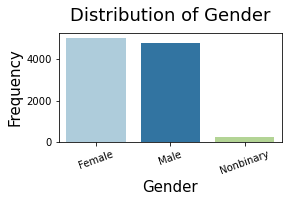

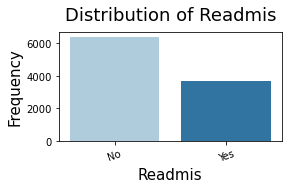

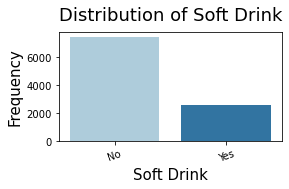

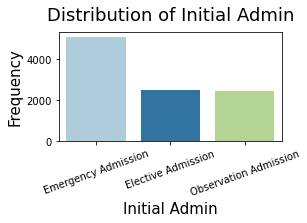

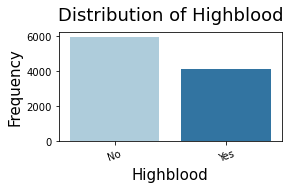

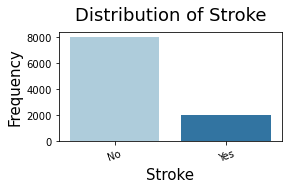

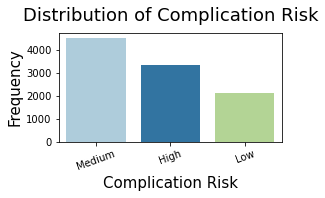

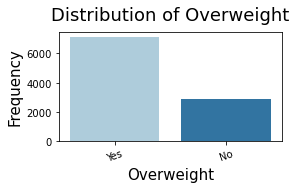

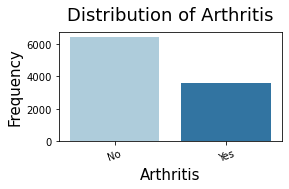

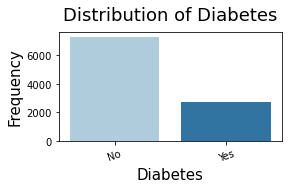

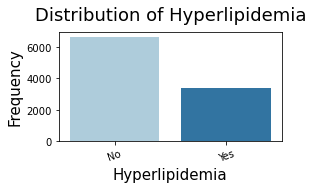

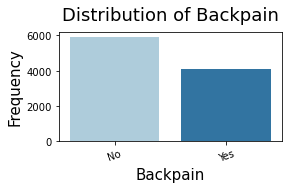

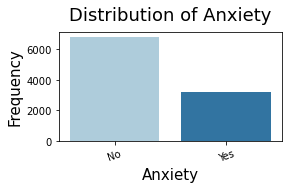

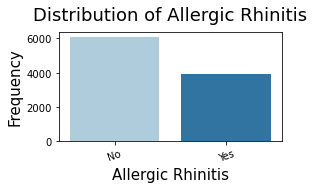

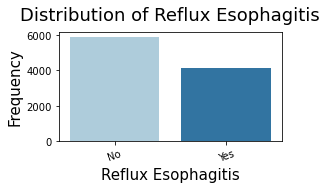

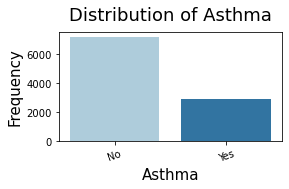

In [26]:
#Univariate visualizations of categorical variables
cat_hist(df)

In [27]:
df.describe() #Numeric values- count, min, max, mean

,Age,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,17.964262,5.012200,1.001400,0.398900,34.455299,5312.172769
std,20.638538,2.017231,1.045734,1.008117,0.628505,26.309341,2180.393838
min,18.000000,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067
25%,36.000000,16.626439,4.000000,0.000000,0.000000,7.896215,3179.374015
50%,53.000000,17.951122,5.000000,1.000000,0.000000,35.836244,5213.952000
75%,71.000000,19.347963,6.000000,2.000000,1.000000,61.161020,7459.699750
max,89.000000,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000


In [28]:
#Find upper and lower limits for outliers
out(df)

{'VitD_levels': 23.430248331250006}
{'VitD_levels': 12.544152781249997}
{'Initial_days': 141.058227953}
{'Initial_days': -72.000993255}
{'TotalCharge': 13880.1883525}
{'TotalCharge': -3241.1145874999993}
{'Age': 123.5}
{'Age': -16.5}
{'Doc_visits': 9.0}
{'Doc_visits': 1.0}
{'Full_meals_eaten': 5.0}
{'Full_meals_eaten': -3.0}
{'vitD_supp': 2.5}
{'vitD_supp': -1.5}


VitD_levels, Doc_visits, Full_meals_eaten, and vitD_supp has outliers. None of the values are unreasonable for their definitions in the data dictionary.  I will leave them in.

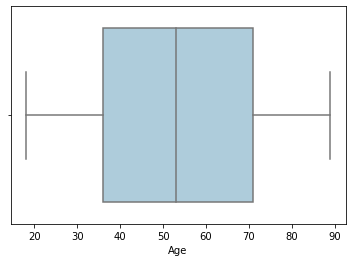

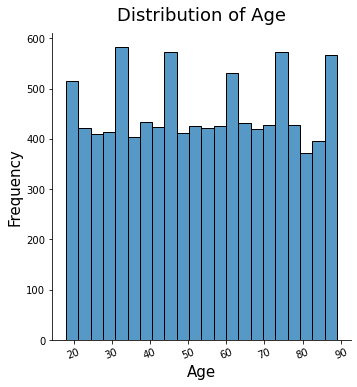

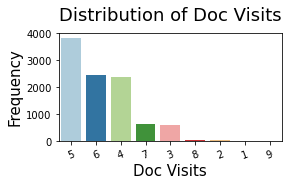

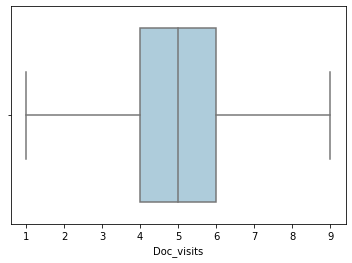

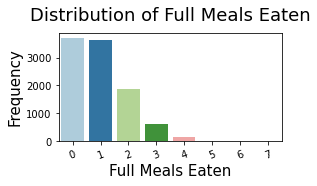

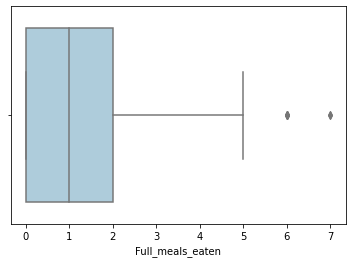

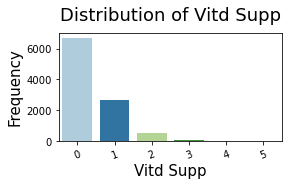

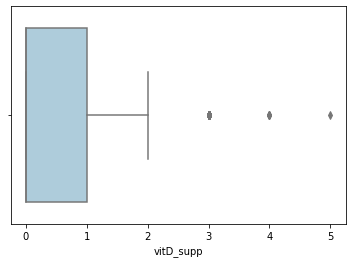

In [29]:
#Univariate visualizations of interger variables
int_hist(df)

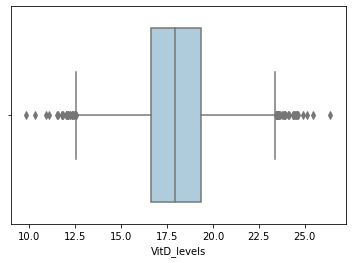

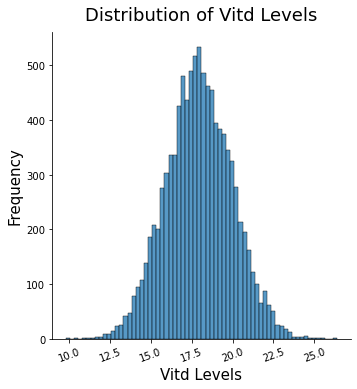

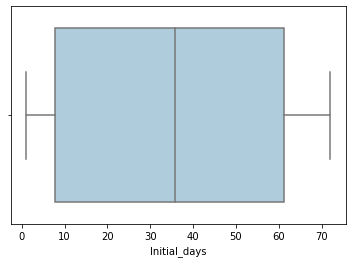

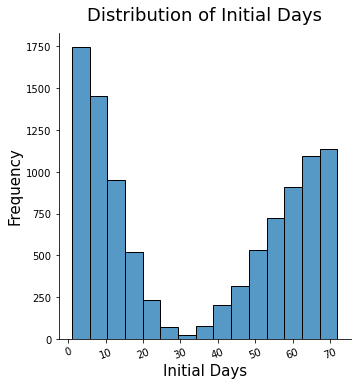

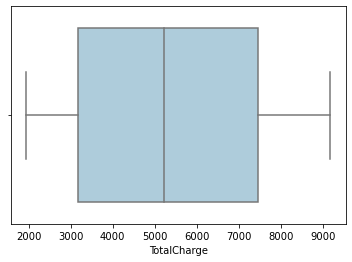

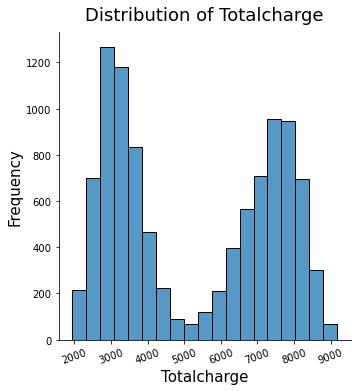

In [30]:
#Univariate visualizations of float variables
float_box(df)

##### Re-express categorical variables to numeric

In [31]:
# Label encoded set for some of the plots
data_lab = df.copy(deep=True)

In [32]:
label(data_lab)

In [33]:
#Create set for dummies
data = df.copy(deep=True)

In [34]:
#Re-express categorical variables
#https://datagy.io/pandas-get-dummies/
categorical_columns = ['Gender','ReAdmis', 'Soft_drink', 'Initial_admin', 'HighBlood', 
            'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia',
           'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']
for column in categorical_columns:
    tempdf = pd.get_dummies(data[column], prefix=column)
    data = pd.merge(
        left=data,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    data = data.drop(columns=column)

In [35]:
data.head()

,Age,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Gender_Female,Gender_Male,Gender_Nonbinary,ReAdmis_No,ReAdmis_Yes,Soft_drink_No,Soft_drink_Yes,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,HighBlood_No,HighBlood_Yes,Stroke_No,Stroke_Yes,Complication_risk_High,Complication_risk_Low,Complication_risk_Medium,Overweight_No,Overweight_Yes,Arthritis_No,Arthritis_Yes,Diabetes_No,Diabetes_Yes,Hyperlipidemia_No,Hyperlipidemia_Yes,BackPain_No,BackPain_Yes,Anxiety_No,Anxiety_Yes,Allergic_rhinitis_No,Allergic_rhinitis_Yes,Reflux_esophagitis_No,Reflux_esophagitis_Yes,Asthma_No,Asthma_Yes
0,53,19.141466,6,0,0,10.585770,3726.702860,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1
1,51,18.940352,4,2,1,15.129562,4193.190458,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0
2,53,18.057507,4,1,0,4.772177,2434.234222,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
3,78,16.576858,4,1,0,1.714879,2127.830423,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1
4,22,17.439069,5,0,2,1.254807,2113.073274,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0


In [36]:
#Drop one of each re-expressed variables and put target last.
data = data[['Age', 'Gender_Nonbinary',  'Gender_Male', 'ReAdmis_Yes','VitD_levels', 'Doc_visits', 'Full_meals_eaten',  
         'vitD_supp', 'Soft_drink_Yes', 'Initial_admin_Elective Admission', 'Initial_admin_Emergency Admission',
         'HighBlood_Yes', 'Stroke_Yes', 'Complication_risk_High', 'Complication_risk_Low', 'Overweight_Yes', 
         'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 
         'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Initial_days','TotalCharge']]

In [37]:
data.head()

,Age,Gender_Nonbinary,Gender_Male,ReAdmis_Yes,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink_Yes,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,HighBlood_Yes,Stroke_Yes,Complication_risk_High,Complication_risk_Low,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Initial_days,TotalCharge
0,53,0,1,0,19.141466,6,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,10.585770,3726.702860
1,51,0,0,0,18.940352,4,2,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,15.129562,4193.190458
2,53,0,0,0,18.057507,4,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,4.772177,2434.234222
3,78,0,1,0,16.576858,4,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1.714879,2127.830423
4,22,0,0,0,17.439069,5,0,2,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1.254807,2113.073274


##### Explore features for inclusion in model

Text(0.5, 1.0, 'Features Correlating with TotalCharge')

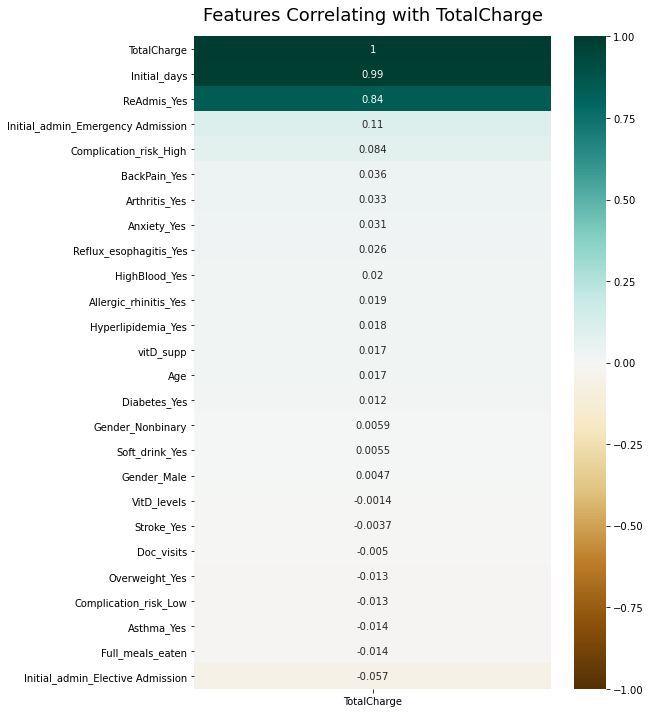

In [38]:
#Heat map list of correlation with target
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['TotalCharge']].sort_values(by='TotalCharge', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with TotalCharge', fontdict={'fontsize':18}, pad=16)

In [39]:
# Check for correlation between independent variables
corr = data.iloc[:, :-1].corr()
corr

,Age,Gender_Nonbinary,Gender_Male,ReAdmis_Yes,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink_Yes,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,HighBlood_Yes,Stroke_Yes,Complication_risk_High,Complication_risk_Low,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Initial_days
Age,1.000000,0.003265,-0.016297,0.015810,0.010315,0.006898,0.008555,0.010014,-0.001337,0.013496,-0.004538,0.007147,0.012035,0.005404,0.001085,-0.008292,0.007110,0.003694,0.003736,0.021081,0.006130,0.012092,-0.019609,0.009229,0.016264
Gender_Nonbinary,0.003265,1.000000,-0.141169,0.006428,0.008457,-0.000404,-0.003633,0.008395,0.006155,0.002256,-0.000393,0.014721,0.004065,0.008982,-0.007559,0.004853,0.012280,-0.002469,0.011458,0.019604,0.004733,-0.004719,-0.013315,0.003185,0.004196
Gender_Male,-0.016297,-0.141169,1.000000,0.009813,-0.013205,-0.006159,0.015159,0.011164,-0.005385,0.026384,-0.011056,0.004434,-0.004642,-0.004703,-0.004992,-0.002831,0.007903,-0.001562,0.014073,-0.015687,-0.007679,-0.000848,-0.015274,0.004247,0.006704
ReAdmis_Yes,0.015810,0.006428,0.009813,1.000000,0.004083,0.000246,-0.012172,0.011039,0.007703,-0.010880,0.019707,0.002270,0.000918,-0.003976,0.001186,-0.008586,0.007663,-0.003058,0.004307,0.013313,0.002406,-0.004651,0.005422,-0.017133,0.850862
VitD_levels,0.010315,0.008457,-0.013205,0.004083,1.000000,0.010210,0.023223,-0.007203,0.004172,-0.017966,0.027322,0.005660,0.006721,-0.002521,-0.009669,0.009689,0.000075,-0.025834,-0.011870,-0.009080,0.007875,-0.005035,-0.014419,0.004937,-0.003642
Doc_visits,0.006898,-0.000404,-0.006159,0.000246,0.010210,1.000000,-0.002767,0.005681,0.011282,-0.019766,0.003686,0.008967,-0.002230,0.013776,-0.006061,0.011890,-0.000719,0.012781,-0.026730,0.008514,-0.001684,0.002920,-0.005330,-0.017989,-0.006754
Full_meals_eaten,0.008555,-0.003633,0.015159,-0.012172,0.023223,-0.002767,1.000000,-0.019980,0.020962,-0.011793,0.006333,0.014784,0.002784,0.013926,-0.012119,-0.008287,0.011591,0.009603,0.000688,-0.015676,0.008602,0.015120,-0.000562,0.012459,-0.017267
vitD_supp,0.010014,0.008395,0.011164,0.011039,-0.007203,0.005681,-0.019980,1.000000,-0.014981,0.022093,-0.001729,0.005340,0.004777,0.015328,0.000131,-0.005185,-0.012839,-0.015768,0.012759,-0.001641,-0.000499,0.009096,-0.005316,-0.021763,0.015974
Soft_drink_Yes,-0.001337,0.006155,-0.005385,0.007703,0.004172,0.011282,0.020962,-0.014981,1.000000,-0.002523,0.021980,-0.006129,0.001604,-0.002753,-0.005695,-0.004888,-0.007304,0.016907,0.016791,0.017496,0.016226,-0.015354,-0.002676,0.010114,0.002432
Initial_admin_Elective Admission,0.013496,0.002256,0.026384,-0.010880,-0.017966,-0.019766,-0.011793,0.022093,-0.002523,1.000000,-0.584944,-0.004289,0.005751,0.019626,-0.009084,0.001862,0.000516,0.009009,-0.012865,-0.010388,-0.005948,0.018031,0.008716,0.004883,0.010040


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

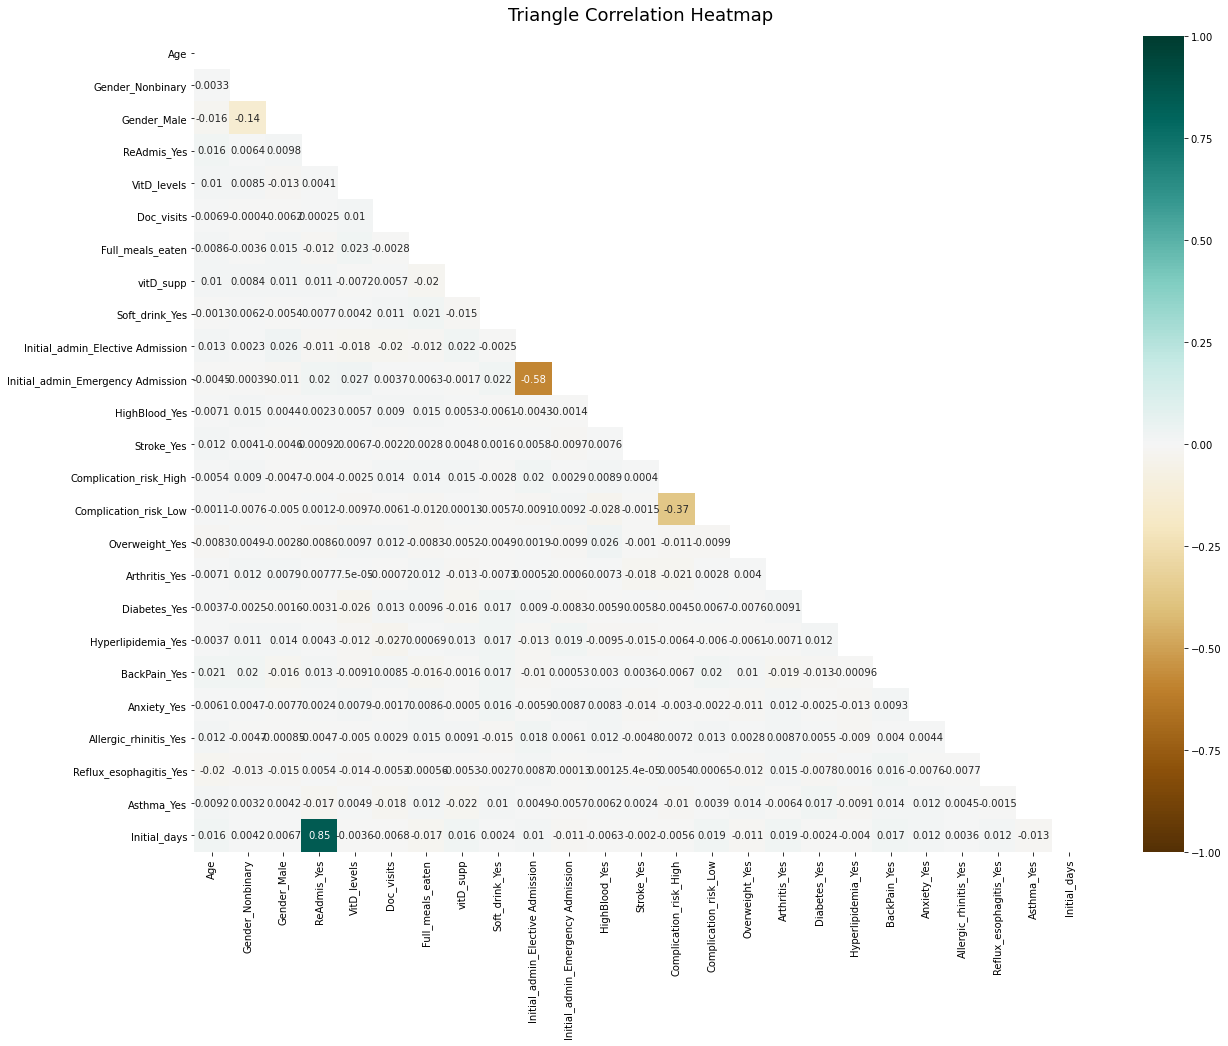

In [40]:
#heat map of independent variables
plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(data.iloc[:, :-1].corr(), dtype=np.bool))
heatmap = sns.heatmap(data.iloc[:, :-1].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [41]:
# Drop highly correlated factors
data = data.drop(['ReAdmis_Yes'], axis=1)

In [42]:
# Check variance_inflation_factor for multicollinearity
x=data.iloc[:,:-1]
VIF(x)

                              feature         VIF
0                               const  124.846265
1                                 Age    1.002571
2                    Gender_Nonbinary    1.021994
3                         Gender_Male    1.023105
4                         VitD_levels    1.003292
5                          Doc_visits    1.002681
6                    Full_meals_eaten    1.003585
7                           vitD_supp    1.003384
8                      Soft_drink_Yes    1.003201
9    Initial_admin_Elective Admission    1.526355
10  Initial_admin_Emergency Admission    1.524566
11                      HighBlood_Yes    1.002692
12                         Stroke_Yes    1.001257
13             Complication_risk_High    1.160959
14              Complication_risk_Low    1.160910
15                     Overweight_Yes    1.002398
16                      Arthritis_Yes    1.002903
17                       Diabetes_Yes    1.002570
18                 Hyperlipidemia_Yes    1.003125


No evidence of multicollinearity

In [43]:
# Define X and y and add constant
X = data.iloc[:, :-1] ## independent variables
y = data["TotalCharge"] ## dependent variable
X = sm.add_constant(X) ##add an intercept to model

In [44]:
#Create train 80% and test 30%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

#### C.4. Generate univariate and bivariate visualizations of the distributions of variables in the cleaned data set. Include the target variable in your bivariate visualizations.

##### Univariate visualizations

See above C.3.

##### Bivariate visualizations

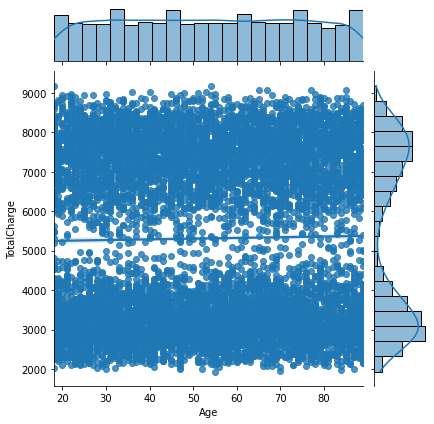

In [45]:
sns.jointplot(x="Age", y="TotalCharge", data=data, kind="reg")

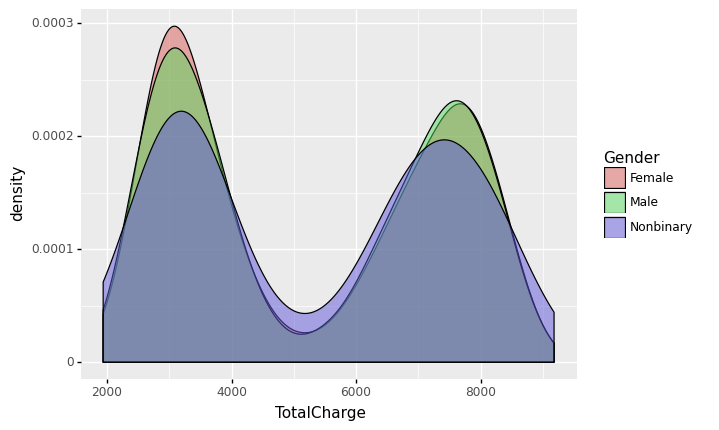

In [46]:
print(p9.ggplot(df)+ p9.aes(x='TotalCharge', fill='Gender') + p9.geom_density(alpha=0.5))

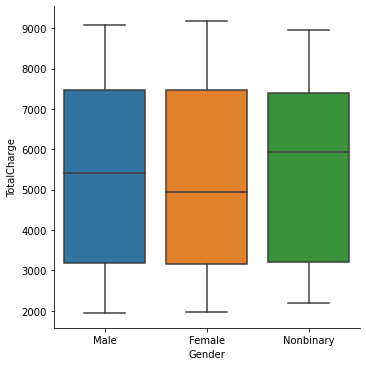

In [47]:
sns.catplot(x="Gender", y="TotalCharge", kind="box", data=df)

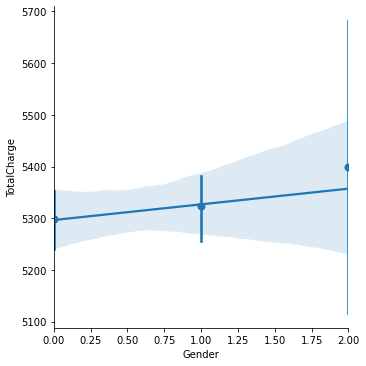

In [48]:
sns.lmplot(x="Gender", y="TotalCharge", data=data_lab, x_estimator=np.mean)

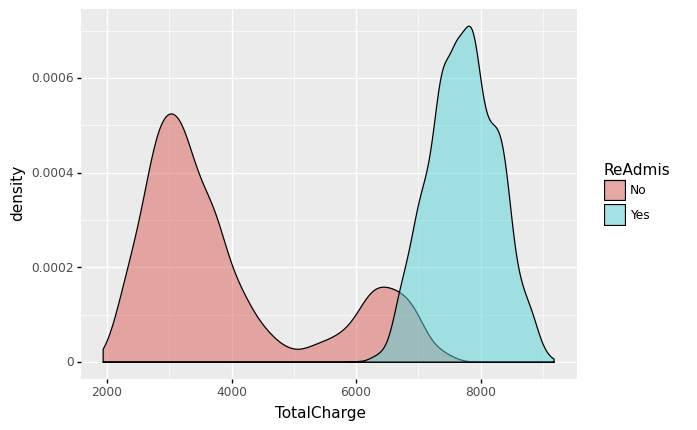

In [49]:
print(p9.ggplot(df)+ p9.aes(x='TotalCharge', fill='ReAdmis') + p9.geom_density(alpha=0.5))

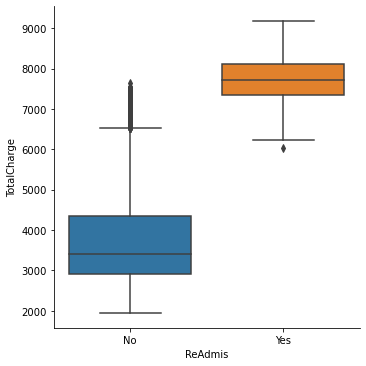

In [50]:
sns.catplot(x="ReAdmis", y="TotalCharge", kind="box", data=df)

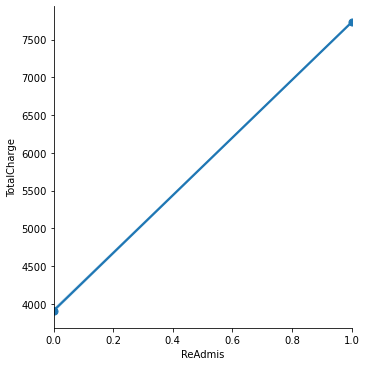

In [51]:
sns.lmplot(x="ReAdmis", y="TotalCharge", data=data_lab, x_estimator=np.mean)

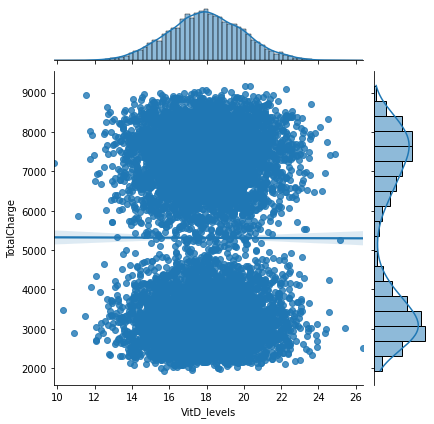

In [52]:
sns.jointplot(x="VitD_levels", y="TotalCharge", data=data, kind="reg")

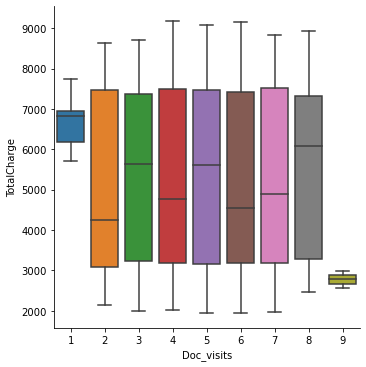

In [53]:
sns.catplot(x="Doc_visits", y="TotalCharge", kind="box", data=df)

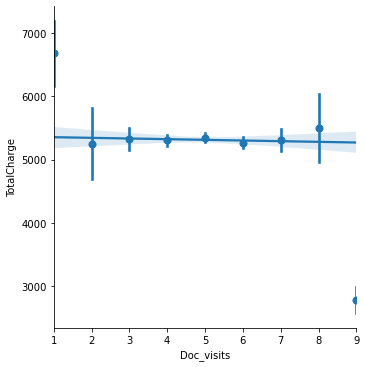

In [54]:
sns.lmplot(x="Doc_visits", y="TotalCharge", data=df, x_estimator=np.mean)

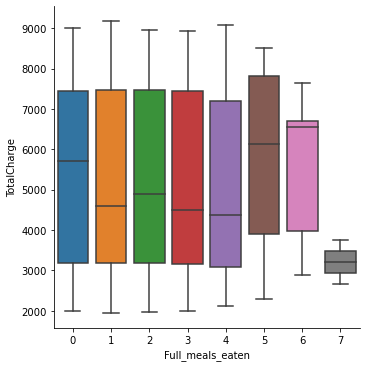

In [55]:
sns.catplot(x="Full_meals_eaten", y="TotalCharge", kind="box", data=df)

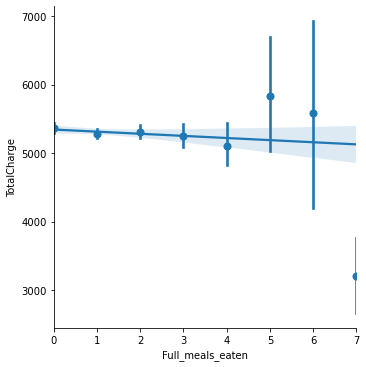

In [56]:
sns.lmplot(x="Full_meals_eaten", y="TotalCharge", data=df_copy, x_estimator=np.mean)

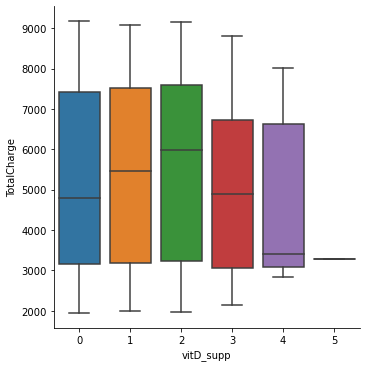

In [57]:
sns.catplot(x="vitD_supp", y="TotalCharge", kind="box", data=df)

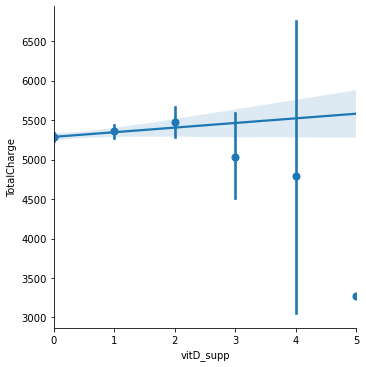

In [58]:
sns.lmplot(x="vitD_supp", y="TotalCharge", data=df, x_estimator=np.mean)

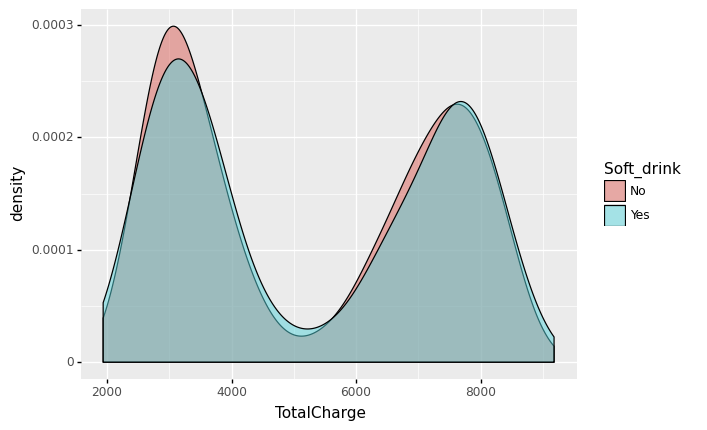

In [59]:
print(p9.ggplot(df)+ p9.aes(x='TotalCharge', fill='Soft_drink') + p9.geom_density(alpha=0.5))

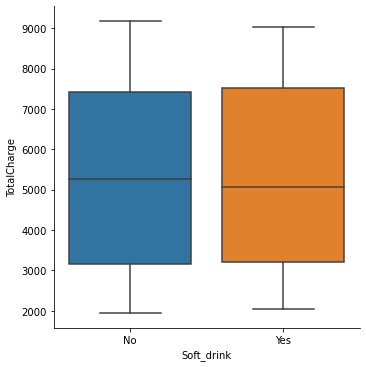

In [60]:
sns.catplot(x="Soft_drink", y="TotalCharge", kind="box", data=df)

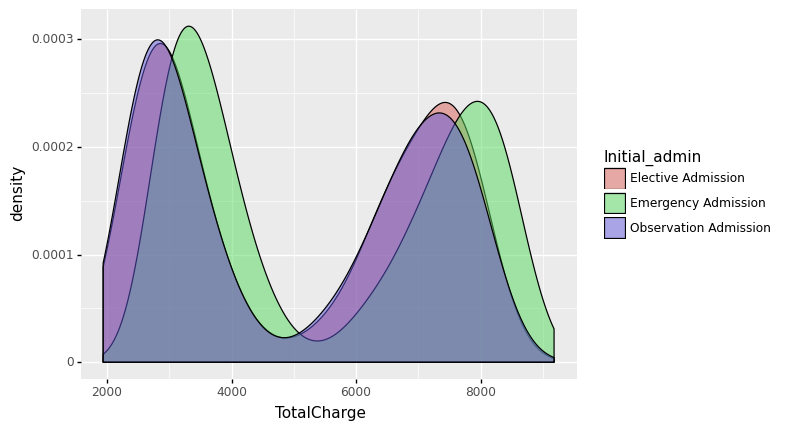

In [61]:
print(p9.ggplot(df)+ p9.aes(x='TotalCharge', fill='Initial_admin') + p9.geom_density(alpha=0.5))

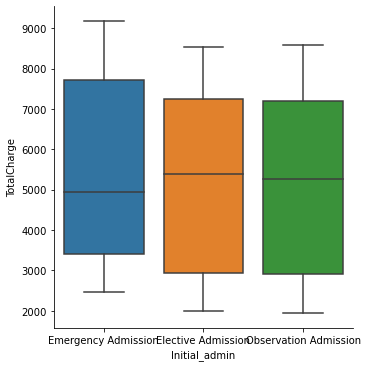

In [62]:
sns.catplot(x="Initial_admin", y="TotalCharge", kind="box", data=df)

In [63]:
dict_init = {'Initial_admin': {2: 1, 0: 2, 1: 3}}
data_lab.replace(dict_init, inplace = True)

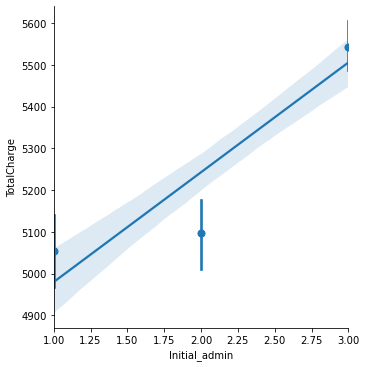

In [64]:
sns.lmplot(x="Initial_admin", y="TotalCharge", data=data_lab, x_estimator=np.mean)

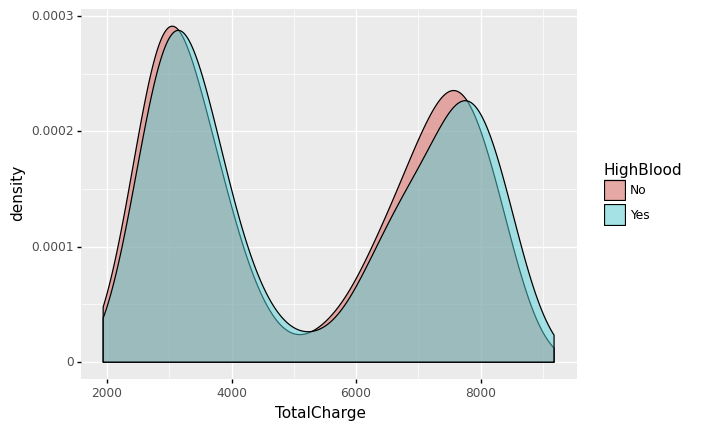

In [65]:
print(p9.ggplot(df)+ p9.aes(x='TotalCharge', fill='HighBlood') + p9.geom_density(alpha=0.5))

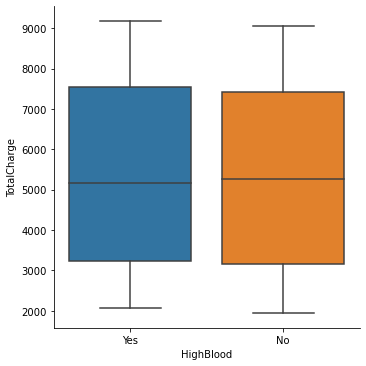

In [66]:
sns.catplot(x="HighBlood", y="TotalCharge", kind="box", data=df)

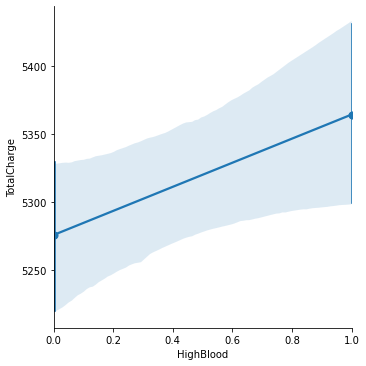

In [67]:
sns.lmplot(x="HighBlood", y="TotalCharge", data=data_lab, x_estimator=np.mean)

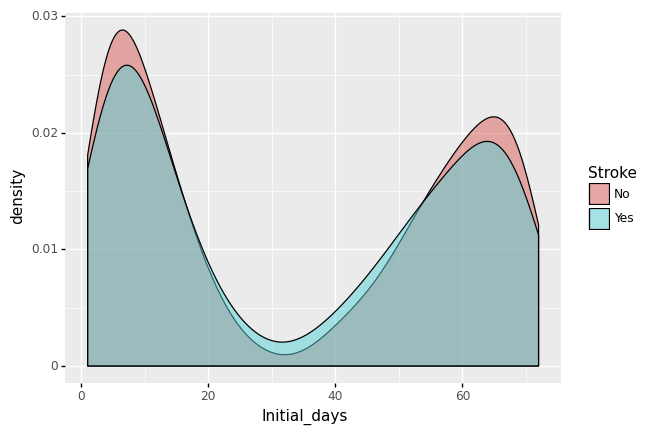

In [68]:
print(p9.ggplot(df)+ p9.aes(x='Initial_days', fill='Stroke') + p9.geom_density(alpha=0.5))

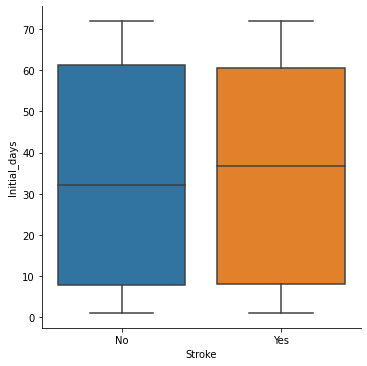

In [69]:
sns.catplot(x="Stroke", y="Initial_days", kind="box", data=df)

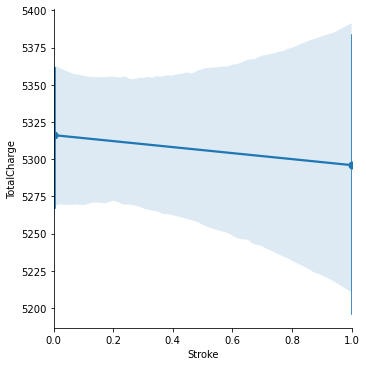

In [70]:
sns.lmplot(x="Stroke", y="TotalCharge", data=data_lab, x_estimator=np.mean)

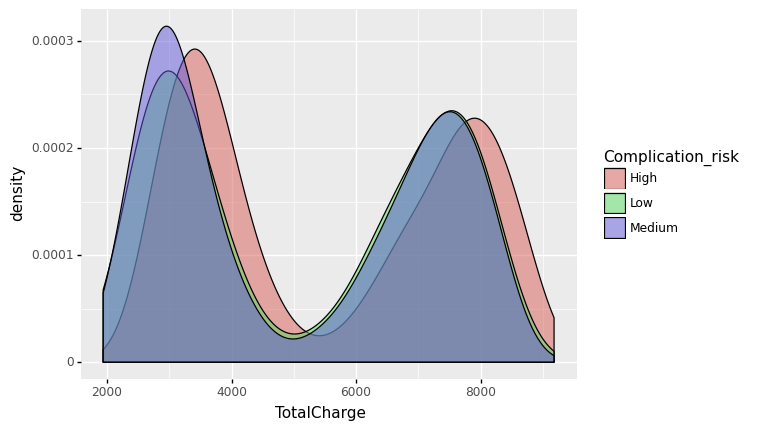

In [71]:
print(p9.ggplot(df)+ p9.aes(x='TotalCharge', fill='Complication_risk') + p9.geom_density(alpha=0.5))

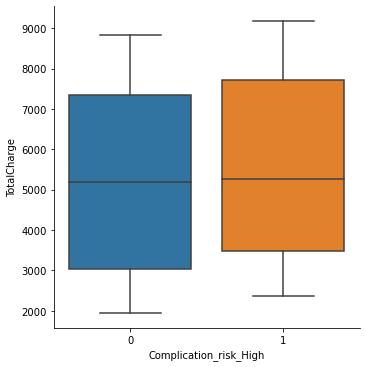

In [72]:
sns.catplot(x="Complication_risk_High", y="TotalCharge", kind="box", data=data)

In [73]:
dict_comp = {'Complication_risk': {1: 1, 2: 2, 0: 3}}
data_lab.replace(dict_comp, inplace = True)

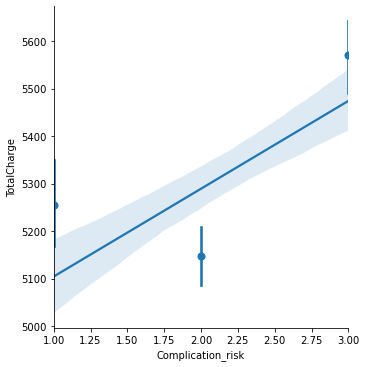

In [74]:
sns.lmplot(x="Complication_risk", y="TotalCharge", data=data_lab, x_estimator=np.mean)

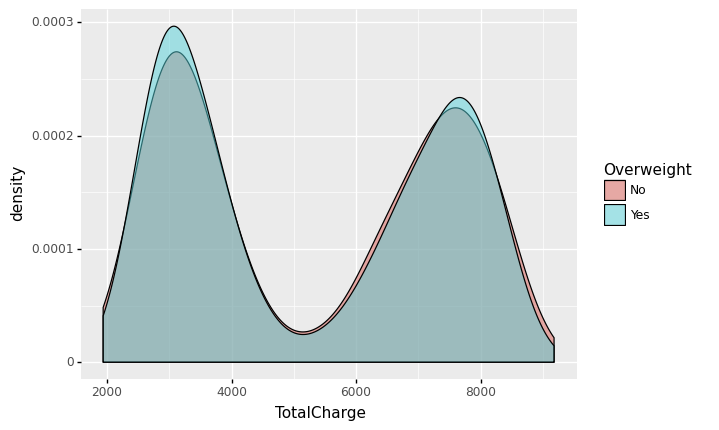

In [75]:
print(p9.ggplot(df)+ p9.aes(x='TotalCharge', fill='Overweight') + p9.geom_density(alpha=0.5))

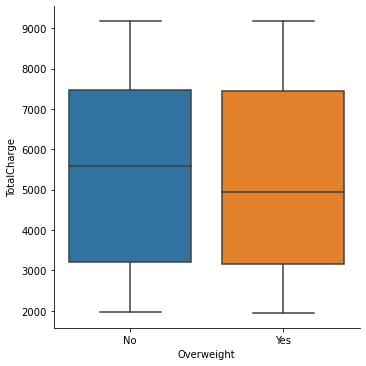

In [76]:
sns.catplot(x="Overweight", y="TotalCharge", kind="box", data=df)

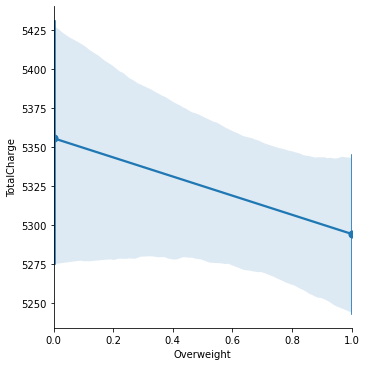

In [77]:
sns.lmplot(x="Overweight", y="TotalCharge", data=data_lab, x_estimator=np.mean)

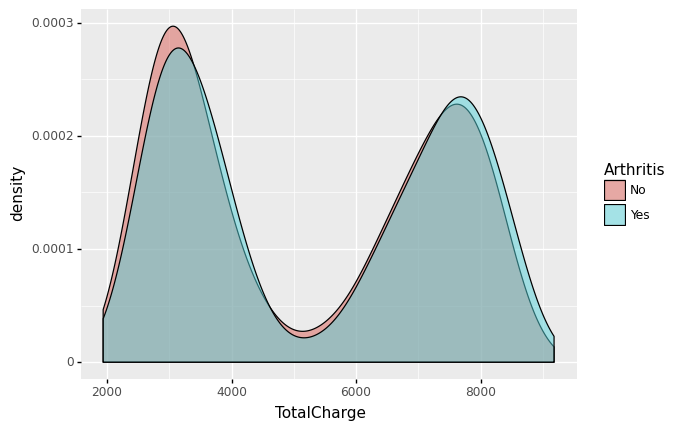

In [78]:
print(p9.ggplot(df)+ p9.aes(x='TotalCharge', fill='Arthritis') + p9.geom_density(alpha=0.5))

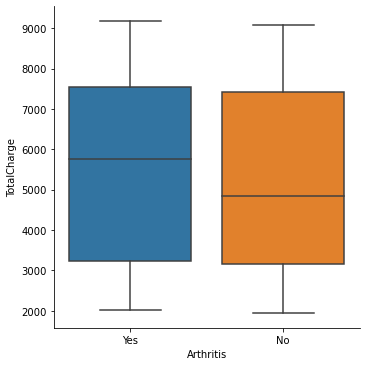

In [79]:
sns.catplot(x="Arthritis", y="TotalCharge", kind="box", data=df)

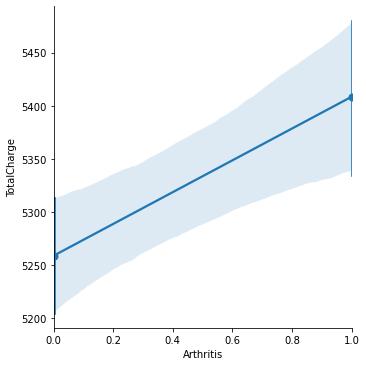

In [80]:
sns.lmplot(x="Arthritis", y="TotalCharge", data=data_lab, x_estimator=np.mean)

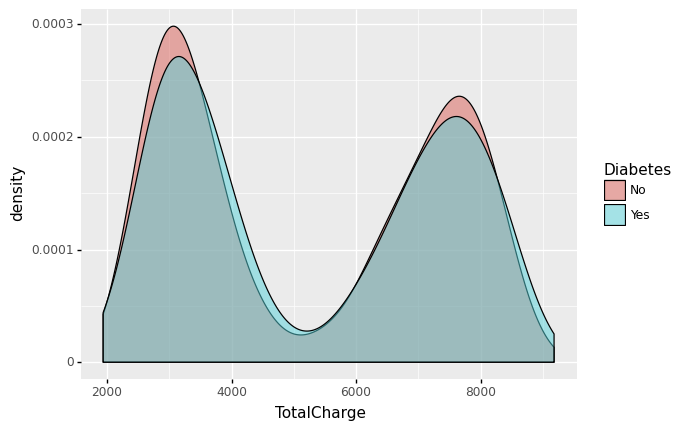

In [81]:
print(p9.ggplot(df)+ p9.aes(x='TotalCharge', fill='Diabetes') + p9.geom_density(alpha=0.5))

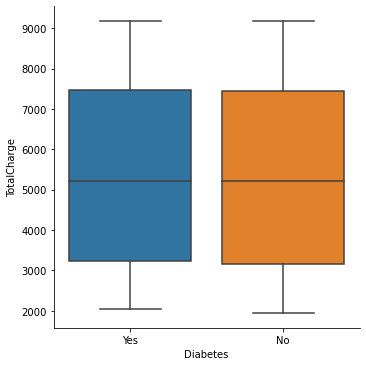

In [82]:
sns.catplot(x="Diabetes", y="TotalCharge", kind="box", data=df)

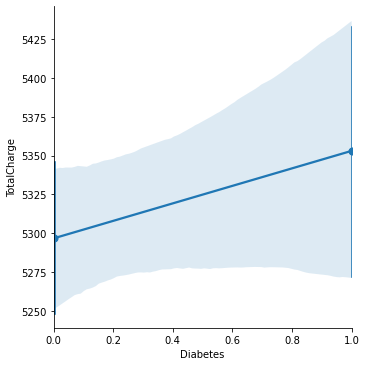

In [83]:
sns.lmplot(x="Diabetes", y="TotalCharge", data=data_lab, x_estimator=np.mean)

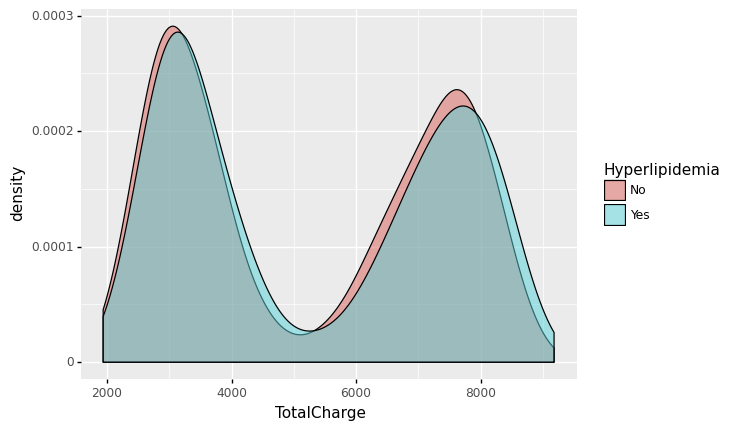

In [84]:
print(p9.ggplot(df)+ p9.aes(x='TotalCharge', fill='Hyperlipidemia') + p9.geom_density(alpha=0.5))

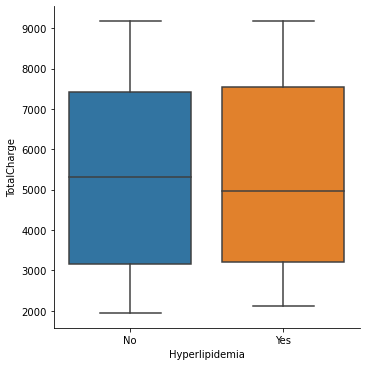

In [85]:
sns.catplot(x="Hyperlipidemia", y="TotalCharge", kind="box", data=df)

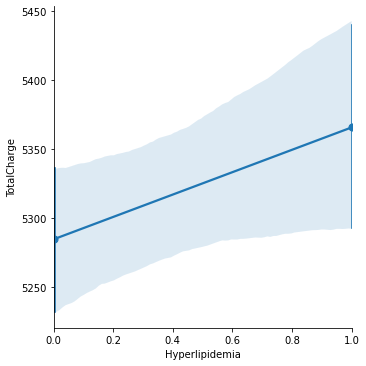

In [86]:
sns.lmplot(x="Hyperlipidemia", y="TotalCharge", data=data_lab, x_estimator=np.mean)

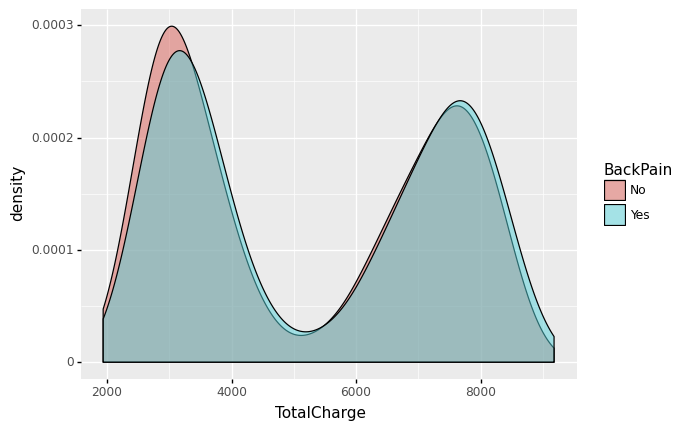

In [87]:
print(p9.ggplot(df)+ p9.aes(x='TotalCharge', fill='BackPain') + p9.geom_density(alpha=0.5))

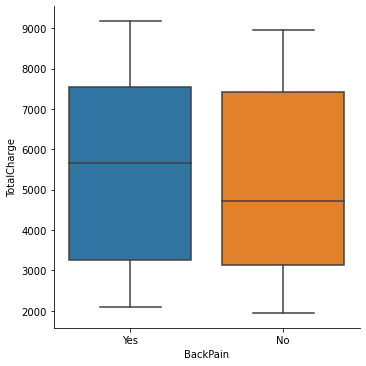

In [88]:
sns.catplot(x="BackPain", y="TotalCharge", kind="box", data=df)

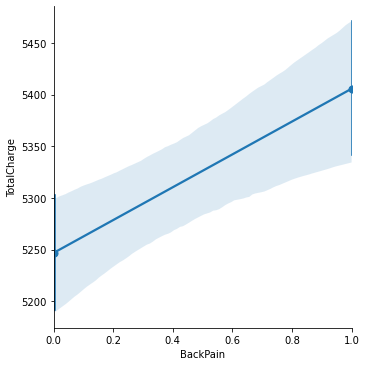

In [89]:
sns.lmplot(x="BackPain", y="TotalCharge", data=data_lab, x_estimator=np.mean)

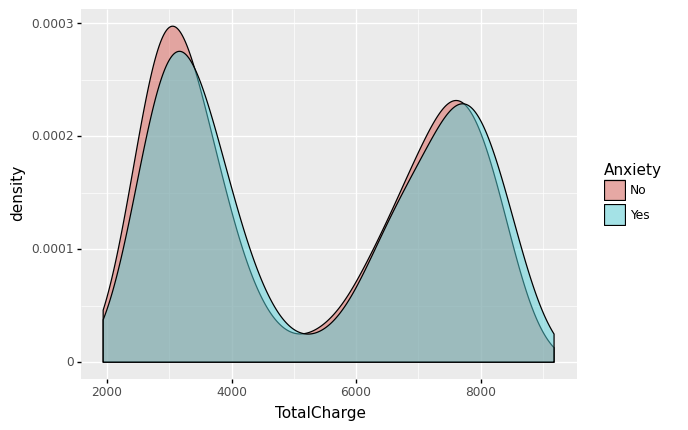

In [90]:
print(p9.ggplot(df)+ p9.aes(x='TotalCharge', fill='Anxiety') + p9.geom_density(alpha=0.5))

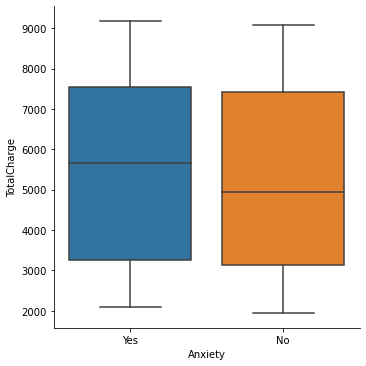

In [91]:
sns.catplot(x="Anxiety", y="TotalCharge", kind="box", data=df)

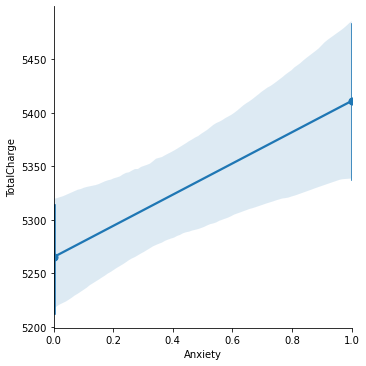

In [92]:
sns.lmplot(x="Anxiety", y="TotalCharge", data=data_lab, x_estimator=np.mean)

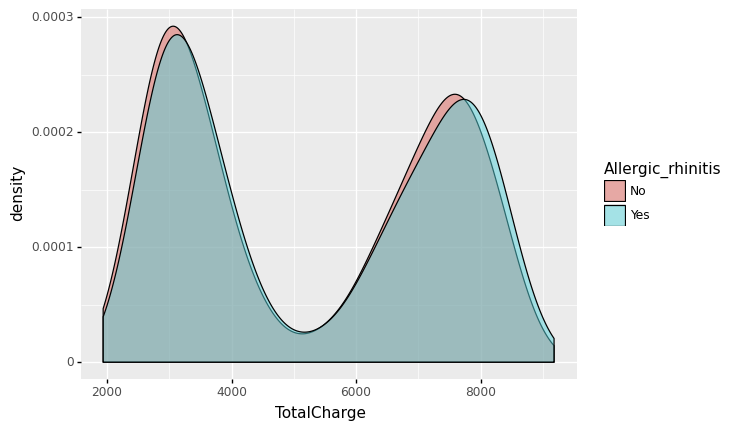

In [93]:
print(p9.ggplot(df)+ p9.aes(x='TotalCharge', fill='Allergic_rhinitis') + p9.geom_density(alpha=0.5))

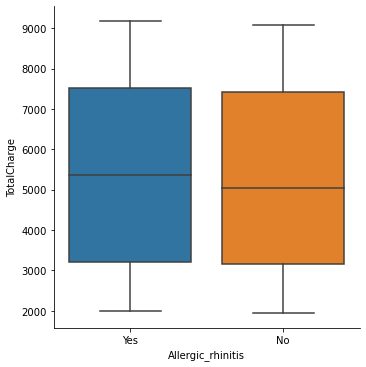

In [94]:
sns.catplot(x="Allergic_rhinitis", y="TotalCharge", kind="box", data=df)

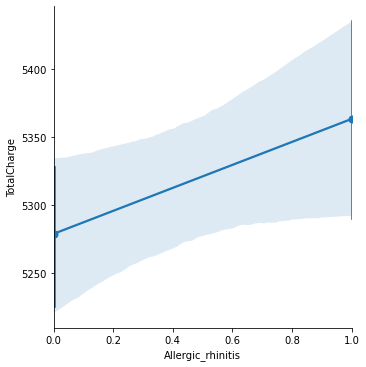

In [95]:
sns.lmplot(x="Allergic_rhinitis", y="TotalCharge", data=data_lab, x_estimator=np.mean)

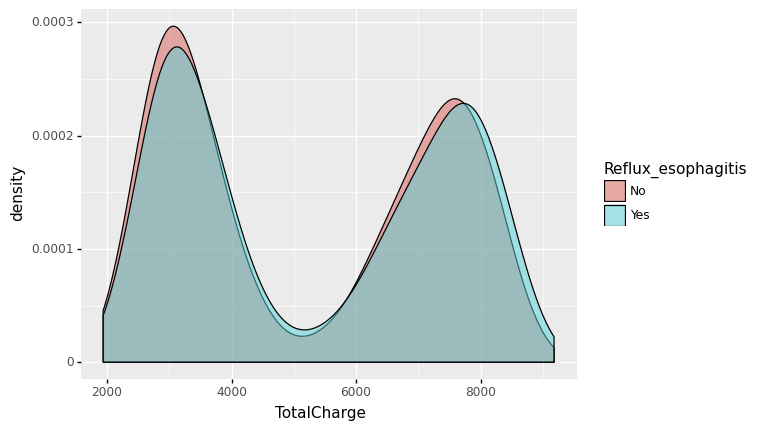

In [96]:
print(p9.ggplot(df)+ p9.aes(x='TotalCharge', fill='Reflux_esophagitis') + p9.geom_density(alpha=0.5))

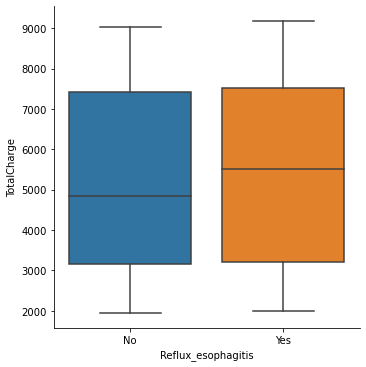

In [97]:
sns.catplot(x="Reflux_esophagitis", y="TotalCharge", kind="box", data=df)

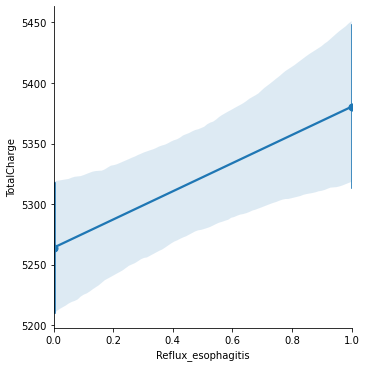

In [98]:
sns.lmplot(x="Reflux_esophagitis", y="TotalCharge", data=data_lab, x_estimator=np.mean)

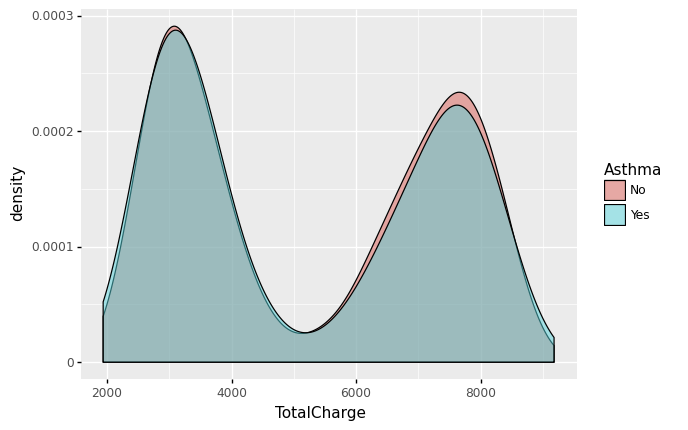

In [99]:
print(p9.ggplot(df)+ p9.aes(x='TotalCharge', fill='Asthma') + p9.geom_density(alpha=0.5))

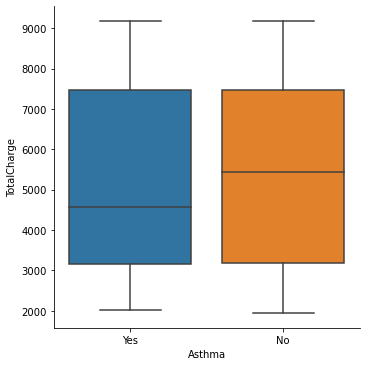

In [100]:
sns.catplot(x="Asthma", y="TotalCharge", kind="box", data=df)

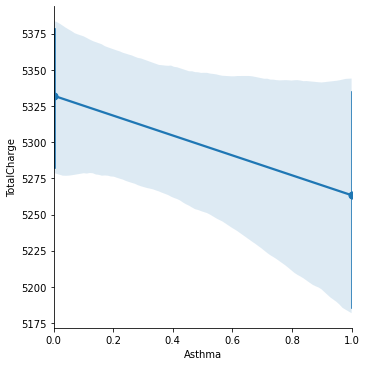

In [101]:
sns.lmplot(x="Asthma", y="TotalCharge", data=data_lab, x_estimator=np.mean)

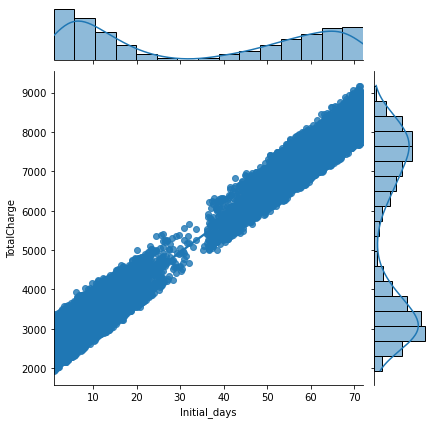

In [102]:
sns.jointplot(x="Initial_days", y="TotalCharge", data=data, kind="reg")

#### C.5. Provide a copy of the prepared data set.

In [103]:
data.to_csv('D208Task1clean.csv')

## Part IV: Model Comparison and Analysis

#### D.1.  Construct an initial multiple regression model from all predictors that were identified in Part C2.

TotalCharge = β0 + (β1 * Age) + (β2 * Gender_Nonbinary) + (β3 * Gender_Male) + (β4 *  VitD_levels) + (β5 * Doc_visits) + (β6 * Full_meals_eaten) + (β7 * vitD_supp) + (β8 * Soft_drink_Yes) + (β9 * Initial_admin_Elective Admission) + (β10 * Initial_admin_Emergency Admission) + (β11 * HighBlood_Yes) + (β12 * Stroke_Yes) + (β13 * Complication_risk_High)  + (β14 * Complication_risk_Low)  + (β15 *  Overweight_Yes) + (β16 * Arthritis_Yes) + (β17 * Diabetes_Yes)  + (β18 * Hyperlipidemia_Yes) + (β19 * BackPain_Yes) + (β20 * Anxiety_Yes) + (β21 *  Allergic_rhinitis_Yes) + (β22 * Reflux_esophagitis_Yes) + (β23 * Asthma_Yes)  + (β24 * Initial_days) 

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.002e+16
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:11:16   Log-Likelihood:                 47789.
No. Observations:                7000   AIC:                        -9.553e+04
Df Residuals:                    6975   BIC:                        -9.536e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

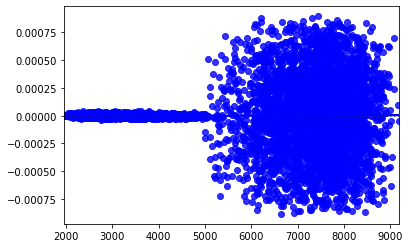

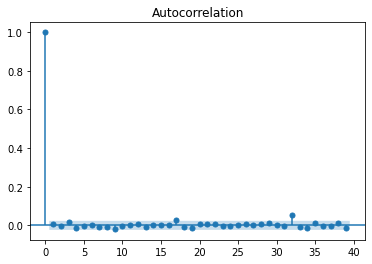

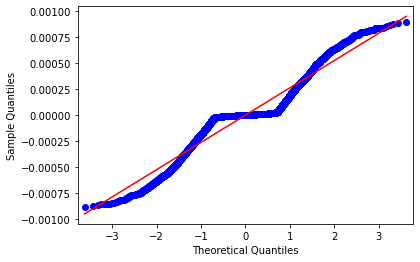

The mean of the residuals is 1.028e-12


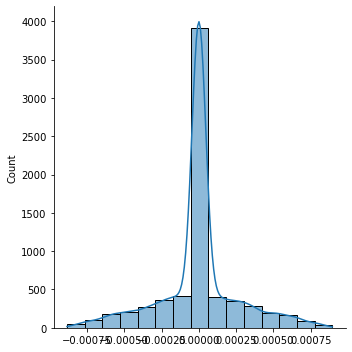

In [104]:
# Initial model with all predictors
model_1 = calc_ols(1, X_train, y_train)

#### D.2. Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.

Initial model R<sub>2</sub> and adjusted R<sub>2</sub> was 1.0 and Prob(F-statistic) was 0.0, but several factors have p-values > 0.05. There is also heteroscedasticity in the variance of the residuals.
The first step in reduction will be to drop the variables with p-values > 0.05. Before looking at the various metrics, I will verify the assumptions of a multiple regression model are met. Metrics for evaluating the assumptions are Breusch-Pagan's Test for homoscedasticity, Ljung-Box test for autocorrelation, Q-Q plots and Omnibus for normality, and VIF and condition for multicollinearity.

If these assumptions, are met the next step is to look at R<sub>2</sub>/ adjusted R<sub>2</sub>  values, RMSE, and the Prob(F-statistic). If any further model reduction is needed, I will use Feature-Engine's recursive feature elimination(RFE) to evaluate which features to keep. Any model produced that meets the assumptions of a multilinear regression will be evaluated against each other looking for the best adjusted R<sub>2</sub>, lowest AIC, highest F-statistic, and RMSE. (Soetewey, 2021)


In [105]:
#Drop high p-values >0.05
X_train2 = X_train.drop(['Age', 'Gender_Male', 'Gender_Nonbinary',  'VitD_levels', 'Doc_visits', 'Full_meals_eaten',  
         'vitD_supp', 'Soft_drink_Yes', 'Stroke_Yes', 'Overweight_Yes', 'Complication_risk_Low', 'Initial_admin_Elective Admission', 'Asthma_Yes'], axis=1)

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.372e+16
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:11:23   Log-Likelihood:                 47786.
No. Observations:                7000   AIC:                        -9.555e+04
Df Residuals:                    6988   BIC:                        -9.546e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

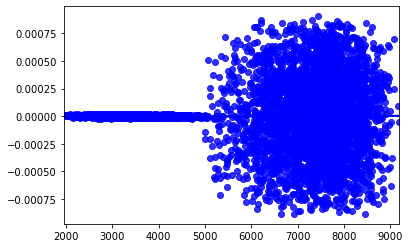

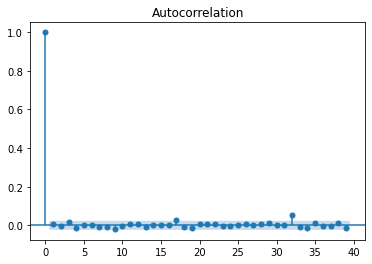

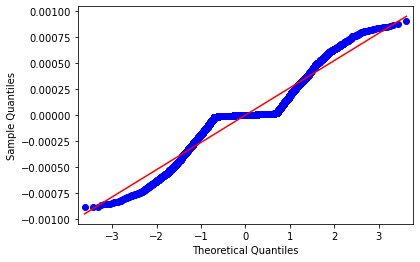

The mean of the residuals is 2.096e-11


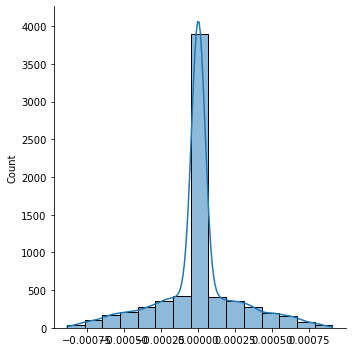

In [106]:
# Reduced model with high p-value predictors dropped
model_2 = calc_ols(2, X_train2, y_train)

The reduced model now has all p-values < 0.05 and R-squared and adjusted R-squared 1.0,  but there is also heteroscedasticity in the variance of the residuals. At this point, I will use Feature Engine's recursive feature elimination(RFE) to evaluate which features to keep.

#####  Recursive Feature Elimination

In [107]:
# initialize linear regresion estimator
linear_model = LinearRegression()

# initialize feature selector
tr = RecursiveFeatureElimination(estimator=linear_model, scoring="r2", cv=3)

In [108]:
# fit transformer
Xt = tr.fit_transform(X_train2, y_train)

In [109]:
# get the initial linear model performance, using all features
tr.initial_model_performance_

0.9999999999999855

In [110]:
# the features to remove
tr.features_to_drop_

['const',
 'HighBlood_Yes',
 'Complication_risk_High',
 'Arthritis_Yes',
 'Diabetes_Yes',
 'Hyperlipidemia_Yes',
 'BackPain_Yes',
 'Anxiety_Yes',
 'Allergic_rhinitis_Yes',
 'Reflux_esophagitis_Yes']

In [111]:
print(Xt.head())

      Initial_admin_Emergency Admission  Initial_days
803                                   1     16.612149
1387                                  0      5.147960
921                                   0      2.048399
5917                                  0     62.617990
9610                                  0     50.926870


The next step is to run the model with the two features identified by RFE: Initial_admin_Emergency Admission and Initial_days.

In [112]:
#Just Initial_admin_Emergency Admission and Initial_days 
X_train3 = X_train2.drop(['HighBlood_Yes', 'Complication_risk_High', 'Arthritis_Yes', 'Diabetes_Yes',
        'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 
         'Reflux_esophagitis_Yes'], axis=1)

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 3.223e+05
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:11:30   Log-Likelihood:                -47865.
No. Observations:                7000   AIC:                         9.574e+04
Df Residuals:                    6997   BIC:                         9.576e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

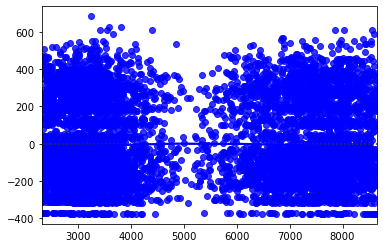

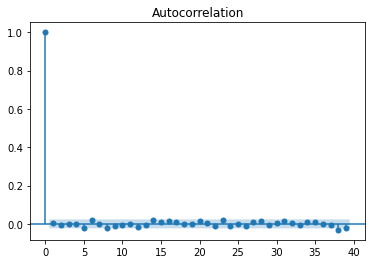

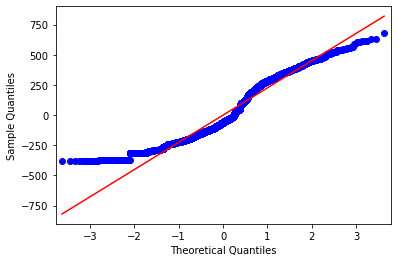

The mean of the residuals is -4.281e-12


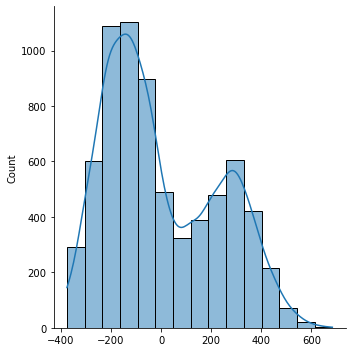

In [113]:
model_3 = calc_ols(3, X_train3, y_train)

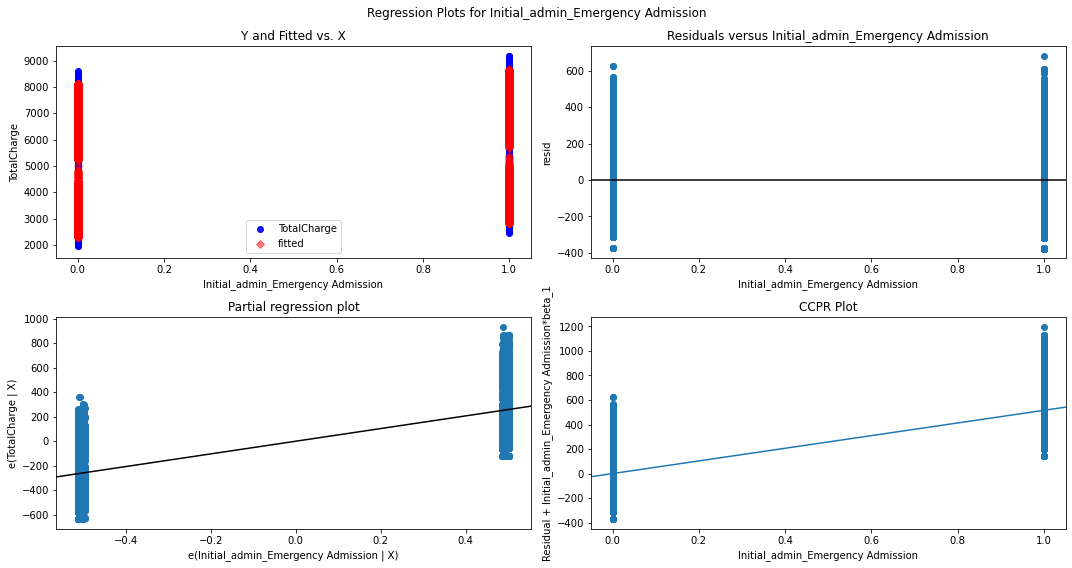

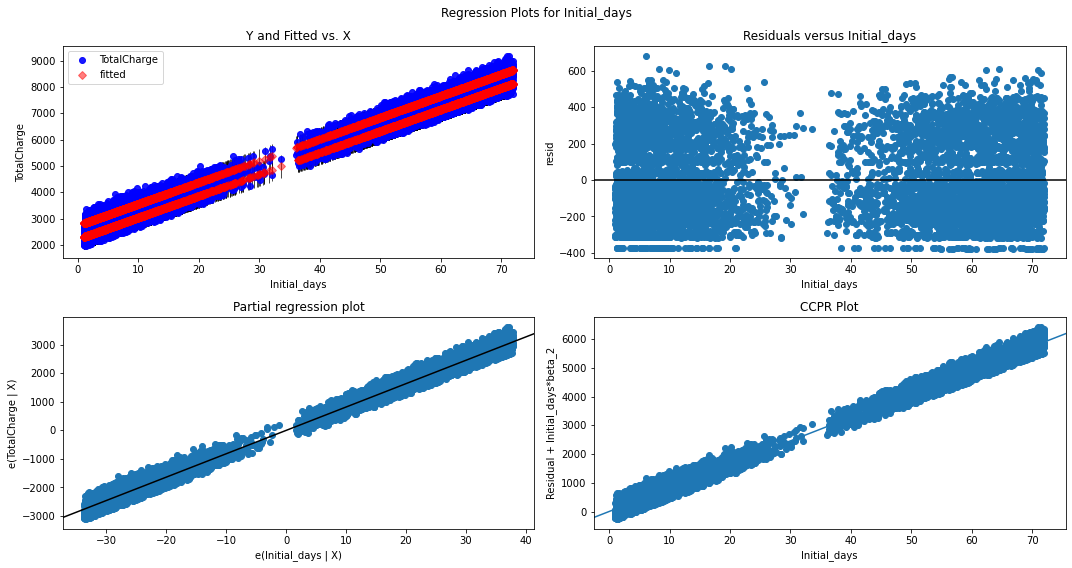

In [114]:
#Residual plots for each factor
resid_plots(model_3)

The third model with the 2 factors identified with RFE  now has R-squared/adjusted 0.989. Tests for heteroscedasticity or autocorrelation are negative.  Unfortunately, residual plots show that the model does not meet the requirement of normality of the residuals.  I plan to add the next most correlated variable, "Complication_risk_High", to the next model.

In [115]:
#add Complication_risk_High,  the next most correlated feature
X_train4 = X_train2.drop(['BackPain_Yes','HighBlood_Yes',   'Arthritis_Yes', 'Diabetes_Yes',
        'Hyperlipidemia_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 
         'Reflux_esophagitis_Yes'], axis=1)

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 8.867e+05
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:11:39   Log-Likelihood:                -42931.
No. Observations:                7000   AIC:                         8.587e+04
Df Residuals:                    6996   BIC:                         8.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

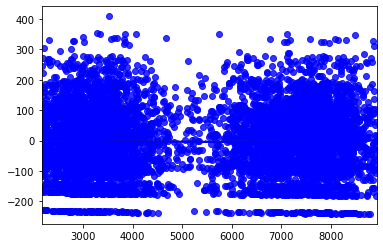

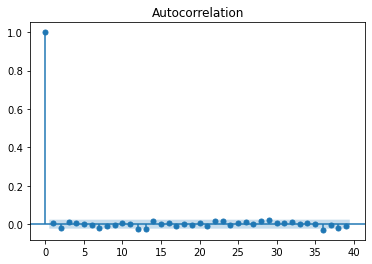

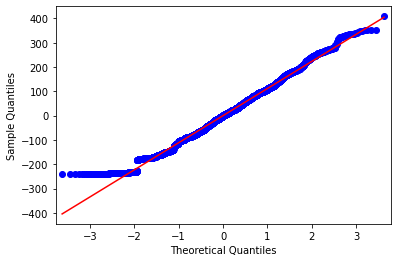

The mean of the residuals is -5.47e-12


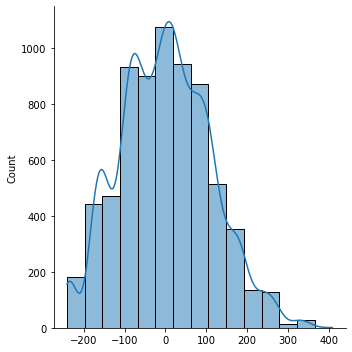

In [116]:
model_4 = calc_ols(4, X_train4, y_train)

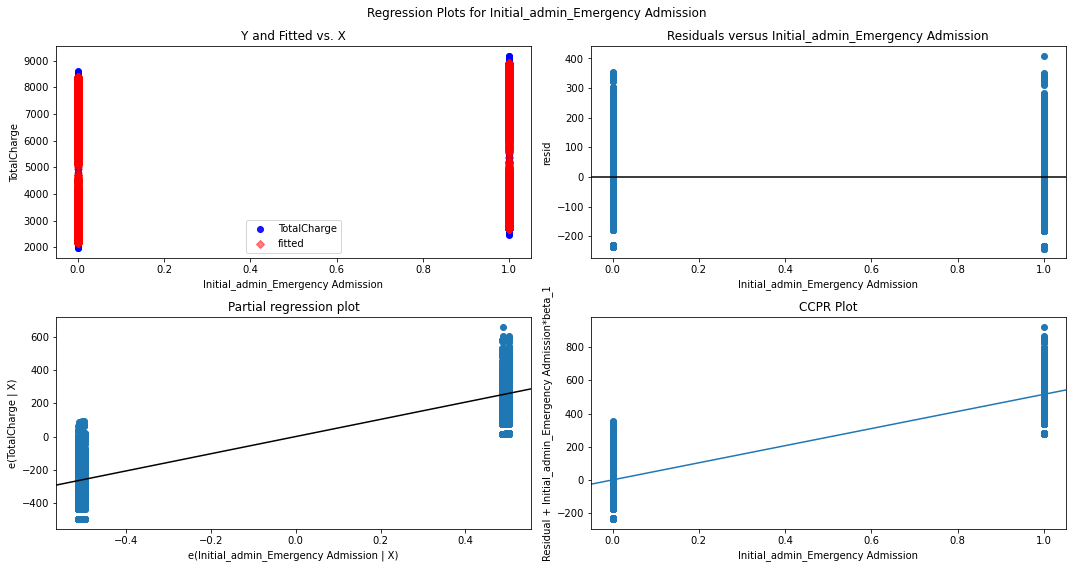

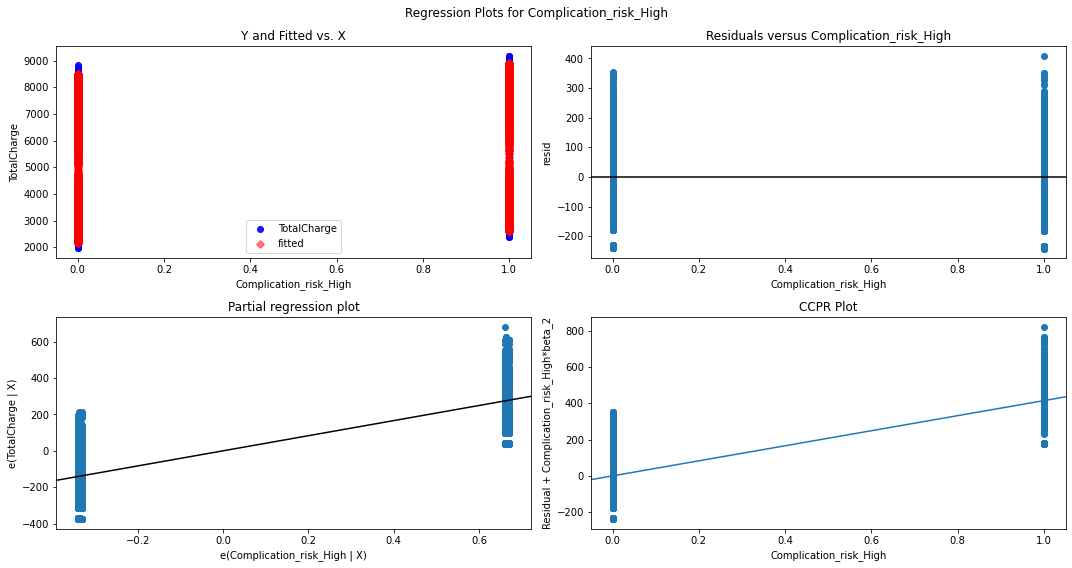

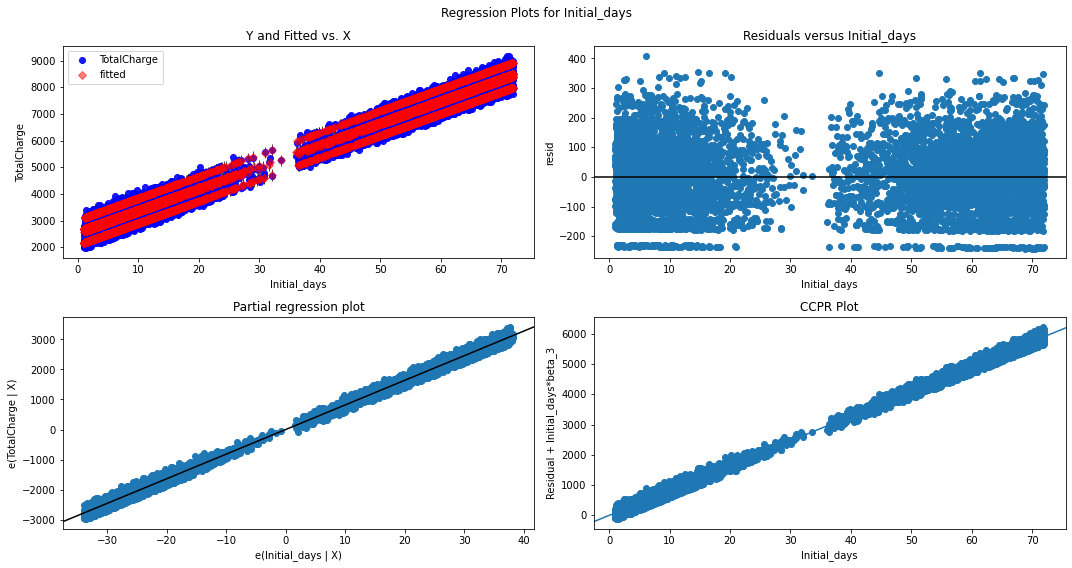

In [117]:
#Residual plots for each factor
resid_plots(model_4)

Model 4 now has R-squared/adjusted 0.989. Tests for heteroscedasticity or autocorrelation and negative.  Residual plots show a much more normal distribution.

##### Run test set with reduced model

In [118]:
#Sub set X_test for predictor columns
X_test4 = X_test.drop(['Age', 'Gender_Male', 'Gender_Nonbinary', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten',  
         'vitD_supp', 'Soft_drink_Yes', 'Stroke_Yes', 'Overweight_Yes', 'Asthma_Yes',
        'BackPain_Yes','HighBlood_Yes',   'Arthritis_Yes', 'Diabetes_Yes',
        'Hyperlipidemia_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 
         'Reflux_esophagitis_Yes', 'Initial_admin_Elective Admission', 'Complication_risk_Low'  ], axis=1)

In [119]:
predict(4, model_4, X_train4, X_test4, y_train, y_test)


Model 4 Prediction Statistics
--------------------------
Root Mean Squared Error (RMSE): Test 113 | Train 112 |           Difference 1 | % Diff 0.008928571428571428
Mean Absolute Error (MAE): Test 91 | Train 90 |           Difference 1 | % Diff 0.011111111111111112


The model has consistent results on the test set.

#### D.3. Provide a reduced multiple regression model that includes both categorical and continuous variables.

TotalCharge = β0 + β1 * Initial_admin_Emergency Admission + β2 * Complication_risk_High + β3 * Initial_days

In [120]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalCharge   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 8.867e+05
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:11:49   Log-Likelihood:                -42931.
No. Observations:                7000   AIC:                         8.587e+04
Df Residuals:                    6996   BIC:                         8.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              2085.5226      2.762    755.109      0.000    2080.109    2090.937
Initial_admin_Emergency Admission   516.2664      2.667    193.596      0.000     511.039     521.494
Complication_risk_High              415.4982      2.824    147.127      0.000     409.962     421.034
Initial_days                         82.0168      0.051   1616.126      0.000      81.917      82.116
==============================================================================
Omnibus:                       59.785   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.518
Skew:                           0.195   Prob(JB):                     3.24e-13
Kurtosis:                       2.789   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### E.  Analyze the data set using your reduced multiple regression model by doing the following:

#### E.1.Explain your data analysis process by comparing the initial and reduced multiple regression models, including the following elements:

 •  **The logic of the variable selection technique:**  
Selection for the initial model started with choosing medically relevant variables based on their definition in the data dictionary. 22 were kept out of the original 49.  Dropped variables included patient identifiers, patient location demographics, information that did not distinguish whether it was from the patient or primary insurance holder, and survey responses. Additionally, variables not relevant to the research question, such as additional charges and services, would be rendered during the hospital stay and not be useful for predicting total charges.
Correlation between target and predictors was evaluated with a correlation map.  Correlation between predictors was evaluated with a correlation matrix. ReAdmis was dropped because it was highly correlated with Initial_days.  Finally, the multicollinearity of predictors was evaluated with variance inflation factors, none needed to be dropped.

Model 1 had several predictors with p-values >0.05, these were removed.  
Model 2 improved with all significant p-values but had issues with heteroscedasticity.
I used the Feature-Engine library's "RecursiveFeatureElimination"  function on the remaining factors.  
Model 3 included the 2 factors identified by RFE. R-squared/adjusted 0.989 and tests for heteroscedasticity or autocorrelation were negative.  Residual plots however showed that the model did not meet the requirement of normality of the residuals. I then add the next most correlated factor.   
Model 4 showed improvement in the residual plot with a more normal distribution.

•  **The model evaluation metric:**   
Looking solely at the metrics of R-squared/Adj. R-squared, AIC, and root mean squared error (RMSE), the initial model might appear better.  However, the metrics were unreliable because the model was overfitted and the distribution of the residuals was heteroscedastic.
The final model's R-squared/Adj dropped slightly by 0.003 points.  It had a more realistic RMSE of 112, a lower condition number of 113, and had a more normal distribution of residuals. (Soetewey, 2021) 

•  **Residual plots**

<AxesSubplot:>

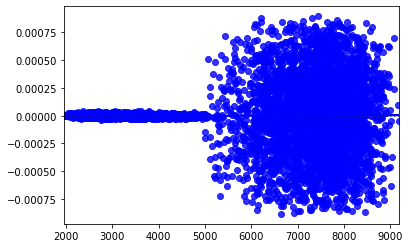

In [121]:
# Initial model 1
y_pred1 = model_1.predict(X_train)
resid = y_train - y_pred1
sns.residplot(x=y_pred1, y=resid, lowess=True, color="b")

<AxesSubplot:>

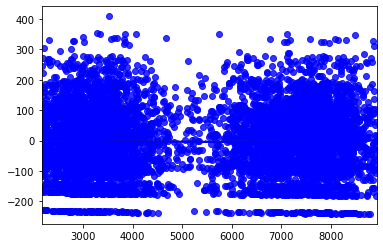

In [122]:
# Final model 4
y_pred4 = model_4.predict(X_train4)
resid = y_train - y_pred4
sns.residplot(x=y_pred4, y=resid, lowess=True, color="b")

#### E.2. Provide the output and any calculations of the analysis you performed, including the model’s residual error.

| Model   | R-squared/ Adj R-squared | F-statistic | Prob | AIC        | RMSE | MAE | Cond | Omnibus  |
|:--------|:-------------------------|:------------|:-----|:-----------|:-----|:----|:-----|:---------|
| Model_1 | 1.00/1.00                | 2.289e+16   | 0.0  | -9.553e+04 | 0    | 0   | 775  | 290.967  |
| Model_2 | 1.00/1.00                | 4.372e+16   | 0.0  | -9.555e+04 | 0    | 0   | 150  | 292.053  |
| Model_3 | 0.989/0.989              | 3.223e+05   | 0.0  | 9.574e+04  | 226  | 194 | 106  | 1132.186 |
| Model_4 | 0.997/0.997              | 8.867e+05   | 0.0  | 8.587e+04  | 112  | 90  | 113  | 59.785   |

#### E.3. Provide the code used to support the implementation of the multiple regression models.

See above.

### Part V: Data Summary and Implications

#### F.  Summarize your findings and assumptions by doing the following:      
#### F.1.  Discuss the results of your data analysis, including the following elements:

•  **A regression equation for the reduced model**

**TotalCharge** = 2085.5226 + 415.4982 * **Complication_risk_High** + 516.2664 * **Initial_admin_Emergency Admission** + 82.0168 * **Initial_days**

•  **An interpretation of coefficients of the statistically significant variables of the model:** 

In the case of the two categorical variables, you add either 0 or the amount listed below, once to the equation. For Complication_Risk, it is 0 if the value is "Low" or "Medium" and 415.4982 if the value is "High". For Initial_days it is 0 for "Observation" or "Elective" and 516.2664 for "Emergency". Initial_days is a numeric variable, so you multiply the value of Initial_days by 82.0168. Units are the same as TotalCharge, dollars.

• **The statistical and practical significance of the model:**

Although the R<sub>2</sub> and adjusted R<sub>2</sub> are high for the final model, it is likely falsely elevated. One would also expect a lower adjusted R<sub>2</sub> however in all the models they were equal. While there was no significant correlation identified in the correlation matrix and the VIF values were all less than two, the condition is > 30 and there is likely some multicollinearity or outside influence in the model.(Bruce, 2020) The elephant in the room for this data set is ReAdmis. The bimodal distribution of TotalCharge and Initial_days correlates strongly with the value of ReAdmis. I suspect that it is contributing to the problem.  
For the research question, " Is it possible to predict the total charge per day for a patient based on the patient's medical history?", this model does not seem to have broad applicability based on comorbidities, it is driven more by whether a patient has been readmitted to the hospital.


•  **The limitations of the data analysis**

Given the bimodal distribution of the target, some other form of analysis might yield better results. There may also be a benefit to dividing the data set by whether the patient was readmitted and analyzed separately. Additionally, while complication risk was found to be significant, none of the single underlying comorbidities on their own was significant enough to include in the model. Not being able to discuss this further with the stakeholders to learn more about how their data is gathered was a limitation. It would also be helpful to have their input about outliers and whether they should be included in the analysis.

#### F.2.  Recommend a course of action based on your results.

I would not recommend this model be used for projecting total charges. If using the present data set, I would recommend splitting the data set as detailed above.  A more accurate model could be created with more insightful data.  I would recommend to stakeholders that quantifying risk factors more precisely would help project costs better. For instance, quantifying diabetes with tools such as the Diabetes Severity Score (DISSCO) instead of a simple yes or no would be more informative. (Zghebi, 2020)

### Part VI: Demonstration

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=9a9a7d5a-aa91-47c7-842b-ae62018945fa

#### H.  List the web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable

https://feature-engine.readthedocs.io/en/latest/user_guide/outliers/OutlierTrimmer.html

https://towardsdatascience.com/a-function-that-makes-your-initial-eda-a-breeze-8e9549d69fb3

https://github.com/cutterback/p02-home-sales-predictive-project/blob/master/Home-Sales-Predictive-Model.ipynb

https://datagy.io/pandas-get-dummies/

#### I. Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

Bruce, Peter, et al. (2020) Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python, O'Reilly Media, Incorporated,  2020.   
   
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ProQuest eBook Central, http://ebookcentral.proquest.com/lib/westerngovernors-ebooks/detail.action?docID=6173908.

Larose, C. D., & Larose, D. T. (2015). Data Mining and Predictive Analytics. ISBN-13: 978-1-1118-1161-1.

Massaron L, Boschetti A. (2016). Regression Analysis with Python. Packt Publishing; 2016. https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1193721&site=eds-live&scope=site

Miraoui, Ilias. (2020) Verifying and Tackling the Assumptions of Linear Regression.
 https://towardsdatascience.com/verifying-and-tackling-the-assumptions-of-linear-regression-32126acea67b

Soetewey,  Antoine. (2021).  Multiple linear regression made simple.
https://medium.com/towards-data-science/multiple-linear-regression-made-simple-d073e55e7d0c

Zghebi SS, and others. (2020) Development and validation of the Diabetes Severity Score (DISSCO) in 139626 individuals with type   
   
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  2 diabetes: a retrospective cohort study. BMJ Open Diabetes Res Care.;8:e000962